## Computing blocking in contrack from long term gh anomaly

In [1]:
%matplotlib inline
from contrack import contrack
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib import cm
import sys, os, argparse
import glob

import matplotlib.patches as mpatches
import matplotlib.path as mpath
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import bottleneck
#import dask.diagnostics
#dask.diagnostics.ProgressBar().register()


## Testing cycle 4 output

In [2]:
#xr_in=xr.open_mfdataset('/scratch/b/b382006/nextgems/cycle2/ngc2013/factory/z500/ngc2013_atm_pl_3h_inst_*')

In [3]:
#xr_in=xr_in.isel(plev=0,drop=True)

In [7]:
#var.to_netcdf('/scratch/b/b382006/obs/era5/factory/era5-anom-z500.nc')

In [1]:
### blocking method based on the original Code of Daniel Steinfeld 
from contrack import contrack
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib import cm
import sys


for yy in range(2020,2025):

####====INPUT
###===ifs 4.4 fesom 5
    print("1. Load files")
    xr_in=xr.open_dataset('/scratch/b/b382006/nextgems/cycle3/IFS_28-FESOM_25-cycle3/z500/ifs-c3-anom-z500_'+str(yy)+'.nc')

###===OUTPUT
###==ifs 4.4 km
#    outpath = '/scratch/b/b382006/nextgems/cycle3/IFS_4.4-FESOM_5/block/ANO_Z500/'
###===IFS_28-NEMO_25
    outpath = '/scratch/b/b382006/nextgems/cycle3/IFS_28-FESOM_25-cycle3/block/ANO_Z500/'

###==subfix ifs 4.4
#    subfix='-ifs-c3-'+str(yy)+''
###==subfix ifs 28 
    subfix='-ifs-c3-'+str(yy)+''

###OUTFILE NAME
    outfile_flag='BLOCKS'+subfix+'.nc'
    outfile_table='BLOCKS'+subfix+'.csv'

###varname
    var="z"

    print('start preprocessing ...')

###varname
    var="z"

    print('start preprocessing ...')

### intitate
    block = contrack()
    block.read_xarray(xr_in)

# Hint: Use block.set_up(...) to do consistency check and set (automatically or manually) names of dimension ('time', 'latitude', 'longitude')
    block.set_up(force=True)
    block.ds=block.ds.compute()


# Finally, track blocking anticyclones (>=150gmp, 50% overlap twosided, 5 timesteps persistence (here 5 days))
    block.run_contrack(variable=var,
                   threshold=160,
                   gorl='>=',
                   overlap=0.7,
                   persistence=20,
                   twosided=True)

# output: variable 'flag'. 440 blocking systems tracked. Each blocking system is identified by a unique flag/ID.
###block


# Out[] Xarray dataset with 2707 time steps.
#            Available fields: z, z_height, anom, flag

# Hint: In case you want to use a more objective threshold, e.g., the 90th percentile of the Z500 anomaly winter distribution over 50°-80°N, do:
# threshold = block['anom'].sel(latitude=slice(80, 50)).quantile([0.90], dim='time').mean() # 177gmp

# save to disk
    block['flag'].to_netcdf(outpath+'/'+outfile_flag,unlimited_dims='time')

###==== flag = output of block.run_contrack(), variable = input variable to calculate intensity and center of mass
    block_df = block.run_lifecycle(flag='flag', variable=var)
    block_df.to_csv(outpath+'/'+outfile_table, index=False)




1. Load files


INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



start preprocessing ...
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
81 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
96 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
78 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
63 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1. Load files
start preprocessing ...
start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 160 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
67 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



In [6]:
#variable='z'
#var = xr.Variable(
#            xr_in[variable].dims,
#            anom_gh,
#            attrs={
#                'units': 'm',
#                'long_name': 'Geopotential Height Anomaly',
#                'standard_name': 'geopotential height anomaly',
#                'history': ' '.join([
#                    'Calculated from {} with input attributes:',
#                    'smoothing time steps = {},',
#                    'climatology = {}.'])
#                    .format(variable, smooth, clim)}
#        )

## Compute anomalies

### Temporal ERA5

In [8]:
#inpath='/work/bm1235/b382006/era5/z500/era5_regio_prl_199*'
#inpath='/scratch/b/b382006/obs/era5/z500/era5_regio_prl_*'
#xr_in=xr.open_mfdataset(inpath, combine='by_coords')
#ds = xr_in.chunk({"time": 100})
#ds.to_zarr("/scratch/b/b382006/obs/era5/z500/output.zarr", mode="w")
# Reopen the optimized dataset
#ds = xr.open_zarr("/scratch/b/b382006/obs/era5/z500/output.zarr")
#daily_mean = ds.resample(time="1D").mean()

#inpath='/scratch/b/b382006/obs/era5/z500/era5_regio_prl_*'
#ds1=xr.open_mfdataset('/work/bm1235/b382006/era5/z500/era5_regio_prl_199*')
#ds2=xr.open_mfdataset('/work/bm1235/b382006/era5/z500/era5_regio_prl_200101*')
#xr_in=xr.merge([ds1,ds2])


iyear=2010
eyear=2020 ## plus one year

# Define the base path and file pattern
base_path = '/work/bm1235/b382006/era5/z500/'
file_patterns = [f"{base_path}era5_regio_prl_{year}*" for year in range(iyear, eyear)]

# Use glob to expand file paths and concatenate them
file_list = []
for pattern in file_patterns:
    file_list.extend(glob.glob(pattern))

# Open the files using xarray
xr_in = xr.open_mfdataset(file_list, combine='by_coords', parallel=True)

#xr_in.sel(time=slice('1990-01','2001-01'))

In [9]:
xr_in

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 181, time: 14608)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * time       (time) datetime64[ns] 2010-01-01 ... 2019-12-31T18:00:00
Data variables:
    z          (time, latitude, longitude) float32 dask.array<chunksize=(4, 181, 360), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-07 19:59:58 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [10]:
### To daily to compare with ICON
#xr_in
xr_in = xr_in.resample(time='D').mean()
### compute climatology
window=31
groupby="dayofyear"
clim = xr_in['z'].groupby("time.dayofyear").mean("time")
clim2 = clim.rolling(**{groupby:window}, center=True).mean().fillna(clim[-window:].mean(dim=groupby))

# ### compute anomaly
smooth=2 ### 8 for 6-hourly, 2 for daily
groupby='dayofyear'
anom=(xr_in['z'].groupby('time.dayofyear') - clim2).rolling(time=smooth, center=True).mean()
#
#    ### cts for computing geopotential height
g = 9.80665  # m s**-2
anom_gh=anom/g
#    ### attributes
anom_gh.attrs['units'] = 'm'
anom_gh.attrs['long_name']= 'Geopotential Height Anomaly'

prefix="era5"
outdir="/scratch/b/b382006/obs/era5/factory/z500_day/"

# SH reverse sign
#anom[:,:96,:] = anom[:,:96,:] * (-1)

# set lat[0] and lat[-1] (North and South Pole) to zero, so that block cannot jump between Hemis (happens sometimes...)
anom_gh[:,0,:] = 0
anom_gh[:,-1,:] = 0
#anom_gh.isel(time=15).plot()

### saving by year and adding 5 days in december
y0=anom_gh.time[0].dt.year
yn=anom_gh.time[-1].dt.year
#npers=20 ###5 days
for yy in range(int(y0),int(yn)+1):
#    print(yy)
    anoms = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy))
#       if (yy != yn):
#        anom_tmp = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy+1))
#        anom_past = anom_tmp[:npers]
#        anoms = xr.concat([anoms, anom_past], dim="time")
#
#       if (yy != y0):
#        anom_tmp = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy-1))
#        anom_pre = anom_tmp[-npers:]
#        anoms = xr.concat([anom_pre,anoms], dim = "time")

    outfile=prefix+"-anom-z500_"+str(yy)+".nc"
    print(outfile)

    anoms.to_netcdf(outdir+outfile)

/fastdata/bm1235/python_environments/hamburg-hackathon/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]


era5-anom-z500_2010.nc
era5-anom-z500_2011.nc
era5-anom-z500_2012.nc
era5-anom-z500_2013.nc
era5-anom-z500_2014.nc
era5-anom-z500_2015.nc
era5-anom-z500_2016.nc
era5-anom-z500_2017.nc
era5-anom-z500_2018.nc
era5-anom-z500_2019.nc


### IFS case

In [12]:
### cycle 4
#id_exp='IFS_9-FESOM_5-production-hist' #IFS_9-FESOM_5-production, IFS_9-FESOM_5-production-hist
#xr_in=xr.open_mfdataset('/scratch/b/b382006/nextgems/prefinal/'+id_exp+'/z/6H/z500_'+id_exp+'_201*')
#prefix="ifs-production"
#outdir="/scratch/b/b382006/nextgems/prefinal/"+id_exp+"/zanom_day/"

### cycle 3
#id_exp="IFS_28-FESOM_25-cycle3" #"IFS_9-NEMO_25-cycle3"  #"IFS_4.4-FESOM_5-cycle3" #"IFS_28-FESOM_25-cycle3" #"IFS_28-NEMO_25-cycle3"
#xr_in=xr.open_mfdataset('/scratch/b/b382006/nextgems/cycle3/'+id_exp+'/z500/6H/z500_*')
#prefix="ifs-production"
#outdir="/scratch/b/b382006/nextgems/cycle3/"+id_exp+"/zanom_day/"
#xr_in

###EERIE
id_exp='ifs-amip-tco1279' #IFS_9-FESOM_5-production, IFS_9-FESOM_5-production-hist
xr_in=xr.open_mfdataset('/scratch/b/b382006/EERIE/cycle1/'+id_exp+'/z500/6H/z500_ifs_c1_201*')
prefix="ifs-production"
outdir="/scratch/b/b382006/EERIE/cycle1/"+id_exp+"/zanom_day/"

In [13]:
xr_in

<xarray.Dataset>
Dimensions:  (time: 14608, lat: 181, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 ... 2019-12-31T18:00:00
  * lat      (lat) int64 -90 -89 -88 -87 -86 -85 -84 ... 84 85 86 87 88 89 90
  * lon      (lon) int64 -180 -179 -178 -177 -176 -175 ... 175 176 177 178 179
Data variables:
    z        (time, lat, lon) float64 dask.array<chunksize=(1460, 181, 360), meta=np.ndarray>

In [14]:
### To daily to compare with ICON
#xr_in
xr_in = xr_in.resample(time='D').mean()
#xr_in

### compute climatology
window=31
groupby="dayofyear"
clim = xr_in['z'].groupby("time.dayofyear").mean("time")
clim2 = clim.rolling(**{groupby:window}, center=True).mean().fillna(clim[-window:].mean(dim=groupby))
#
#    ### compute anomaly
smooth=2 ### 8 for 6-hourly, 2 for daily
groupby='dayofyear'
anom=(xr_in['z'].groupby('time.dayofyear') - clim2).rolling(time=smooth, center=True).mean()
#
#    ### cts for computing geopotential height
g = 9.80665  # m s**-2
anom_gh=anom/g
#    ### attributes
anom_gh.attrs['units'] = 'm'
anom_gh.attrs['long_name']= 'Geopotential Height Anomaly'


/fastdata/bm1235/python_environments/hamburg-hackathon/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]


In [15]:
###

In [16]:
if not os.path.exists(outdir):
    os.makedirs(outdir)
# SH reverse sign
#anom[:,:96,:] = anom[:,:96,:] * (-1)

# set lat[0] and lat[-1] (North and South Pole) to zero, so that block cannot jump between Hemis (happens sometimes...)
anom_gh[:,0,:] = 0
anom_gh[:,-1,:] = 0
#anom_gh.isel(time=15).plot()

### saving by year and adding 5 days in december
y0=anom_gh.time[0].dt.year
yn=anom_gh.time[-1].dt.year
#npers=20 ###5 days
for yy in range(int(y0),int(yn)+1):
#    print(yy)
    anoms = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy))
#       if (yy != yn):
#        anom_tmp = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy+1))
#        anom_past = anom_tmp[:npers]
#        anoms = xr.concat([anoms, anom_past], dim="time")
#
#       if (yy != y0):
#        anom_tmp = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy-1))
#        anom_pre = anom_tmp[-npers:]
#        anoms = xr.concat([anom_pre,anoms], dim = "time")

    outfile=prefix+"-anom-z500_"+str(yy)+".nc"
    print(outfile)

    anoms.to_netcdf(outdir+outfile)

ifs-production-anom-z500_2010.nc
ifs-production-anom-z500_2011.nc
ifs-production-anom-z500_2012.nc
ifs-production-anom-z500_2013.nc
ifs-production-anom-z500_2014.nc
ifs-production-anom-z500_2015.nc
ifs-production-anom-z500_2016.nc
ifs-production-anom-z500_2017.nc
ifs-production-anom-z500_2018.nc
ifs-production-anom-z500_2019.nc


### temporal for ICON 

In [2]:
iyear=2025
eyear=2030 ## plus one year

# Define the base path and file pattern
### icon cycle 3
#base_path = '/scratch/b/b382006/nextgems/cycle3/ngc3028/zg/6H/'
### icon cycle 4 (from 2025 to 2049)
base_path = '/work/bm1235/b382006/nextgems/prefinal/ngc4008/zg/daily/'
file_patterns = [f"{base_path}zg50000_icon_prefinal_day_{year}*" for year in range(iyear, eyear)]

# Use glob to expand file paths and concatenate them
file_list = []
for pattern in file_patterns:
    file_list.extend(glob.glob(pattern))

# Open the files using xarray
xr_in = xr.open_mfdataset(file_list, combine='by_coords', parallel=True)

In [3]:
xr_in

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 181, time: 1826)
Coordinates:
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat      (lat) int64 90 89 88 87 86 85 84 83 ... -84 -85 -86 -87 -88 -89 -90
  * time     (time) datetime64[ns] 2025-01-01 2025-01-02 ... 2029-12-31
Data variables:
    zg       (time, lat, lon) float32 dask.array<chunksize=(31, 181, 360), meta=np.ndarray>

In [4]:
var="zg"
#prefix="ngc3028"
#outdir="/scratch/b/b382006/nextgems/cycle3/ngc3028/factory/z500/"
prefix="ngc4008"
outdir="/scratch/b/b382006/nextgems/prefinal/ngc4008/zg/"

print('start preprocessing ...')

    ### get rid of plev dimmension
    ##for cycle 2
    #xr_in=xr_in.isel(plev=0,drop=True)

    ### compute climatology
window=31
groupby="dayofyear"
clim = xr_in[var].groupby("time.dayofyear").mean("time")
clim2 = clim.rolling(**{groupby:window}, center=True).mean().fillna(clim[-window:].mean(dim=groupby))

### compute anomaly
smooth=2 ### 8 for 6-hourly, 2 for daily
groupby='dayofyear'
anom_gh=(xr_in[var].groupby('time.dayofyear') - clim2).rolling(time=smooth, center=True).mean()

    ### saving by year and adding 5 days in december
y0=anom_gh.time[0].dt.year
yn=anom_gh.time[-1].dt.year
#npers=20 ###5 days

for yy in range(int(y0),int(yn)+1):
        anoms = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy))
#       if (yy != yn):
#        anom_tmp = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy+1))
#        anom_past = anom_tmp[:npers]
#        anoms = xr.concat([anoms, anom_past], dim="time")
#
#       if (yy != y0):
#        anom_tmp = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy-1))
#        anom_pre = anom_tmp[-npers:]
#        anoms = xr.concat([anom_pre,anoms], dim = "time")

        outfile=prefix+"-anom-z500_"+str(yy)+".nc"
        print(outfile)

        anoms.to_netcdf(outdir+outfile)

start preprocessing ...
ngc4008-anom-z500_2025.nc
ngc4008-anom-z500_2026.nc
ngc4008-anom-z500_2027.nc
ngc4008-anom-z500_2028.nc
ngc4008-anom-z500_2029.nc


In [13]:
########*********

### CMIP6 

In [2]:
## Models
#ACCESS-CM2  CESM2-WACCM  MIROC6         MPI-ESM1-2-LR  
#CESM2       EC-Earth3    MPI-ESM1-2-HR  MRI-ESM2-0 
#xr_in=xr.open_mfdataset('/work/bm1235/b382006/cmip6/EC-Earth3/r1i1p1f1/daily/200?/Z*')
#xr_in
model='MPI-ESM1-2-LR'
member='r1i1p1f1' #'r11i1p1f1', 'r1i1p1f1'

In [3]:
#xr_in['Z'].sel(plev='50000', drop=True)
#outfile
import glob
iyear=1995
eyear=2005 ## plus one year

# Define the base path and file pattern
#base_path = '/work/bm1235/b382006/era5/z500/'
file_patterns = [f"/work/bm1235/b382006/cmip6/{model}/{member}/daily/{year}/Z{year}*" for year in range(iyear, eyear)]

# Use glob to expand file paths and concatenate them
file_list = []
for pattern in file_patterns:
    file_list.extend(glob.glob(pattern))

# Open the files using xarray
xr_in = xr.open_mfdataset(file_list, combine='by_coords', parallel=True)
xr_in

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180, time: 3650, plev: 6)
Coordinates:
  * lon      (lon) int64 -180 -179 -178 -177 -176 -175 ... 175 176 177 178 179
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 86.0 87.0 88.0 89.0
  * time     (time) datetime64[ns] 1995-01-01T12:00:00 ... 2004-12-31T12:00:00
  * plev     (plev) float64 2e+04 3e+04 5e+04 7e+04 8.5e+04 1e+05
Data variables:
    Q        (plev, time, lat, lon) float32 dask.array<chunksize=(6, 1, 180, 360), meta=np.ndarray>
    T        (plev, time, lat, lon) float64 dask.array<chunksize=(6, 1, 180, 360), meta=np.ndarray>
    U        (plev, time, lat, lon) float32 dask.array<chunksize=(6, 1, 180, 360), meta=np.ndarray>
    V        (plev, time, lat, lon) float32 dask.array<chunksize=(6, 1, 180, 360), meta=np.ndarray>
    Z        (plev, time, lat, lon) float64 dask.array<chunksize=(6, 1, 180, 360), meta=np.ndarray>

In [4]:
#xr_in
#xr_in = xr_in.resample(time='D').mean()
### compute climatology
window=31
groupby="dayofyear"
clim = xr_in['Z'].sel(plev='50000', drop=True).groupby("time.dayofyear").mean("time")
clim2 = clim.rolling(**{groupby:window}, center=True).mean().fillna(clim[-window:].mean(dim=groupby))
#
#    ### compute anomaly
smooth=2 ### 8 for 6-hourly, 2 for daily
groupby='dayofyear'
anom=(xr_in['Z'].sel(plev='50000', drop=True).groupby('time.dayofyear') - clim2).rolling(time=smooth, center=True).mean()
#
#    ### cts for computing geopotential height
g = 9.80665  # m s**-2
anom_gh=anom/g
#    ### attributes
anom_gh.attrs['units'] = 'm'
anom_gh.attrs['long_name']= 'Geopotential Height Anomaly'

prefix="cmip6"
outdir="/scratch/b/b382006/cmip6/"+model+"/"+member+"/factory/z500_day/"

# SH reverse sign
#anom[:,:96,:] = anom[:,:96,:] * (-1)

# set lat[0] and lat[-1] (North and South Pole) to zero, so that block cannot jump between Hemis (happens sometimes...)
anom_gh[:,0,:] = 0
anom_gh[:,-1,:] = 0
#anom_gh.isel(time=15).plot()

### saving by year and adding 5 days in december
y0=anom_gh.time[0].dt.year
yn=anom_gh.time[-1].dt.year
#npers=20 ###5 days
for yy in range(int(y0),int(yn)+1):
#    print(yy)
    anoms = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy))
#       if (yy != yn):
#        anom_tmp = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy+1))
#        anom_past = anom_tmp[:npers]
#        anoms = xr.concat([anoms, anom_past], dim="time")
#
#       if (yy != y0):
#        anom_tmp = anom_gh.sel(time=anom_gh.time.dt.year.isin(yy-1))
#        anom_pre = anom_tmp[-npers:]
#        anoms = xr.concat([anom_pre,anoms], dim = "time")

    outfile=prefix+"-anom-z500_"+str(yy)+".nc"
    print(outfile)

    anoms.to_netcdf(outdir+outfile)

/fastdata/bm1235/python_environments/hamburg-hackathon/lib/python3.10/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 10 times more chunks
  return self.array[key]


cmip6-anom-z500_1995.nc
cmip6-anom-z500_1996.nc
cmip6-anom-z500_1997.nc
cmip6-anom-z500_1998.nc
cmip6-anom-z500_1999.nc
cmip6-anom-z500_2000.nc
cmip6-anom-z500_2001.nc
cmip6-anom-z500_2002.nc
cmip6-anom-z500_2003.nc
cmip6-anom-z500_2004.nc


## Compute blocks

### ERA5

In [3]:
### daily
xr_in=xr.open_mfdataset('/scratch/b/b382006/obs/era5/factory/z500_day/era5-anom-z500_*')

In [4]:
###=== Look at this!!!
#'/work/bm1235/b382006/era5/block/ANO_Z5002'
#outpath = '/scratch/b/b382006/obs/era5/block/ANO_Z500'
#outpath = '/scratch/b/b382006/obs/era5/block/ANO_Z5002' 
outpath = '/scratch/b/b382006/obs/era5/block/ANO_Z500_90th' 

if not os.path.exists(outpath):
    os.makedirs(outpath)


### intitate
block = contrack()
#block.read_xarray(z_dataset)
block.read_xarray(xr_in)

## calculate geopotential height
#block.calculate_gph_from_gp(gp_name='z',
#                            gp_unit='m**2 s**-2',
#                            gph_name='z_height')
#
# Hint: Use block.set_up(...) to do consistency check and set (automatically or manually) names of dimension ('time', 'latitude', 'longitude')
block.set_up(force=True)

block.ds = block.ds.compute() ### look at this!

# Hint: Use 'clim=...' to point towards an existing climatological mean (useful for weather forecasts)
# output: variable 'anom'.

# Finally, track blocking anticyclones (>=150gmp, 50% overlap twosided, 5 timesteps persistence (here 5 days))
# threshold = block['anom'].sel(latitude=slice(80, 50)).quantile([0.90], dim='time').mean() # 177gmp
block.run_contrack(variable='z',
#                   threshold=160,
                   threshold = block['z'].sel(latitude=slice(80, 50)).quantile([0.90], dim='time').mean().values, # 177gmp
                   gorl='>=',
                   overlap=0.5, #0.5, 0.7
                   persistence=5, #5, 20
                   twosided=True)

yy0=int(block['time'].time[0].dt.year)
yyn=int(block['time'].time[-1].dt.year)


###==subfix ifs 28 
subfix='-ERA5-'+str(yy0)+'-'+str(yyn)+''

###OUTFILE NAME
outfile_flag='BLOCKS'+subfix+'.nc'
outfile_table='BLOCKS'+subfix+'.csv'
# save to disk
block['flag'].to_netcdf(outpath+'/'+outfile_flag,unlimited_dims='time')

var='z'
###==== flag = output of block.run_contrack(), variable = input variable to calculate intensity and center of mass
block_df = block.run_lifecycle(flag='flag', variable=var)
block_df.to_csv(outpath+'/'+outfile_table, index=False)


INFO: 
 time: 'time'
 longitude: 'longitude'
 latitude: 'latitude'

INFO: 
Run ConTrack 
########### 
    threshold:    >= 146.5152954899368 
    overlap:      0.5 
    persistence:  5 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'longitude'
 latitude: 'latitude'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
1805 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'longitude'
 latitude: 'latitude'



In [8]:
###

### IFS 

In [3]:
### load anomalies
### cycle 4
### 6 hourly
###xr_in=xr.open_mfdataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/zanom2/ifs-production-anom-z500_204*')
### daily
#id_exp='IFS_9-FESOM_5-production-hist' #IFS_9-FESOM_5-production, IFS_9-FESOM_5-production-hist
#xr_in=xr.open_mfdataset('/scratch/b/b382006/nextgems/prefinal/'+id_exp+'/zanom_day/ifs-production-anom-z500_*')

### cycle 3
## daily
#id_exp="IFS_28-FESOM_25-cycle3" #"IFS_28-FESOM_25-cycle3" #"IFS_9-NEMO_25-cycle3"  #"IFS_4.4-FESOM_5-cycle3", #"IFS_28-FESOM_25-cycle3"
#xr_in=xr.open_mfdataset("/scratch/b/b382006/nextgems/cycle3/"+id_exp+"/zanom_day/ifs-production-anom-z500_*")

##EERIE
id_exp='ifs-amip-tco1279' ###IFS_9-FESOM_5-production, IFS_9-FESOM_5-production-hist
xr_in=xr.open_mfdataset('/scratch/b/b382006/EERIE/cycle1/'+id_exp+'/zanom_day/ifs-production-anom-z500_*')

In [4]:
###=== WARNING CHECK THIS***
### cycle 4
### nextgems overview paper --> fixed thereshols
##outpath = '/scratch/b/b382006/nextgems/prefinal/'+id_exp+'/block/ANO_Z5002'
### blocking paper  --> different threshold
#outpath = '/scratch/b/b382006/nextgems/prefinal/'+id_exp+'/block/ANO_Z500_90th'

### cylce 3
#outpath = '/scratch/b/b382006/nextgems/cycle3/'+id_exp+'/block/ANO_Z500_90th'
#if not os.path.exists(outpath):
#    os.makedirs(outpath)

### EERIE 
outpath = '/scratch/b/b382006/EERIE/cycle1/'+id_exp+'/block/ANO_Z500_90th'
if not os.path.exists(outpath):
    os.makedirs(outpath)
    
xr_in

<xarray.Dataset>
Dimensions:    (lat: 181, lon: 360, time: 10957)
Coordinates:
  * lat        (lat) int64 -90 -89 -88 -87 -86 -85 -84 ... 84 85 86 87 88 89 90
  * lon        (lon) int64 -180 -179 -178 -177 -176 -175 ... 175 176 177 178 179
  * time       (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2019-12-31
    dayofyear  (time) int64 dask.array<chunksize=(365,), meta=np.ndarray>
Data variables:
    z          (time, lat, lon) float64 dask.array<chunksize=(365, 181, 360), meta=np.ndarray>

In [5]:
yy0=int(xr_in['time'].time[0].dt.year)
yyn=int(xr_in['time'].time[-1].dt.year)
print(yy0,yyn)
    
###==subfix ifs 4.4
#    subfix='-ifs-c3-'+str(yy)+''
###==subfix ifs 28 
subfix='-ifs-production-'+str(yy0)+'-'+str(yyn)+''

###OUTFILE NAME
outfile_flag='BLOCKS'+subfix+'.nc'
outfile_table='BLOCKS'+subfix+'.csv'

###change to yyyy mm dd
#xr_in['time']=xr_in.indexes['time'].normalize()
#xr_in

## rename zfull
#xr_in=xr_in.rename({'zfull':'z_height'})
#xr_in

### Take geopotential
#in_z_500=xr_in.z_height.sel(plev=50000.0)
#z_dataset=xr.DataArray.to_dataset(in_z_500)
#z_dataset

### intitate
block = contrack()
#block.read_xarray(z_dataset)
block.read_xarray(xr_in)

## calculate geopotential height
#block.calculate_gph_from_gp(gp_name='z',
#                            gp_unit='m**2 s**-2',
#                            gph_name='z_height')
#
# Hint: Use block.set_up(...) to do consistency check and set (automatically or manually) names of dimension ('time', 'latitude', 'longitude')
block.set_up(force=True)

block.ds = block.ds.compute() ### look at this!
#block.time

# calculate Z500 anomaly (temporally smoothed with a 2 d running mean) with respect to the 31-day running mean (long-term: 30 years) climatology
#block.calc_anom(variable='z_height',
#                smooth=8,
#                window=31,
#                groupby='dayofyear')
# Hint: Use 'clim=...' to point towards an existing climatological mean (useful for weather forecasts)
# output: variable 'anom'.

# Finally, track blocking anticyclones (>=150gmp, 50% overlap twosided, 5 timesteps persistence (here 5 days))
block.run_contrack(variable='z',
##                   threshold=160,
                   threshold = block['z'].sel(lat=slice(50, 80)).quantile([0.90], dim='time').mean().values, # 177gmp
#                   threshold = block['z'].sel(lat=slice(80, 50)).quantile([0.90], dim='time').mean().values, # 177gmp
                   gorl='>=',
                   overlap=0.5, #0.5, 0.7
                   persistence=5, #5, 20
                   twosided=True)

# save to disk
block['flag'].to_netcdf(outpath+'/'+outfile_flag,unlimited_dims='time')

var='z'
###==== flag = output of block.run_contrack(), variable = input variable to calculate intensity and center of mass
block_df = block.run_lifecycle(flag='flag', variable=var)
block_df.to_csv(outpath+'/'+outfile_table, index=False)

INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



1990 2019


/home/b/b382006/.conda/envs/contrack_dev/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
INFO: 
Run ConTrack 
########### 
    threshold:    >= 145.8911930318851 
    overlap:      0.5 
    persistence:  5 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
1958 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



### ICON

In [2]:
####====INPUT
###===ngc2013 time missed solve???
print("1. Load files")
###xr_in=xr.open_dataset('/scratch/b/b382006/nextgems/cycle3/ngc3028/factory/z500/ngc3028-anom-z500_'+str(yy)+'.nc')
###=== ngc4008
###xr_in=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/zg/ngc4008-anom-z500_'+str(yy)+'.nc')
xr_in=xr.open_mfdataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/zg/ngc4008-anom-z500*.nc')
###=== ngc4008 destinE
#xr_in=xr.open_mfdataset('/scratch/b/b382006/icon-climate-dt/zanom_day/ngc4008-anom-z500*.nc')

###===OUTPUT depends on the thereshold method!!!
###outpath = '/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z5002'
outpath = '/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500_90th'
###DestinE
#outpath = '/scratch/b/b382006/icon-climate-dt/block/ANO_Z500_90th'

###varname
### var="zfull" ##ngc2013
var="zg"    ##ngc3028
print('start preprocessing ...')

### intitate
block = contrack()
block.read_xarray(xr_in)

# Hint: Use block.set_up(...) to do consistency check and set (automatically or manually) names of dimension ('time', 'latitude', 'longitude')
block.set_up(force=True)
block.ds=block.ds.compute()


# Finally, track blocking anticyclones (>=150gmp, 50% overlap twosided, 5 timesteps persistence (here 5 days))
block.run_contrack(variable=var,
#                   threshold=160,
                   threshold = block['zg'].sel(lat=slice(80, 50)).quantile([0.90], dim='time').mean().values, # 177gmp
                   gorl='>=',
                   overlap=0.5, #0.5, 0.7
                   persistence=5, #5, 20
                   twosided=True)

# save to disk
yy0=int(block['time'].time[0].dt.year)
yyn=int(block['time'].time[-1].dt.year)
print(yy0,yyn)

###==subfix ngc2013
###    subfix='-icon-ngc2013-'+str(yy)+''
###==subfix ngc3028
###    subfix='-icon-ngc3028-'+str(yy)+''
###==subfix ngc4008
subfix='-icon-ngc4008-'+str(yy0)+'-'+str(yyn)+''

###OUTFILE NAME
outfile_flag='BLOCKS'+subfix+'.nc'
outfile_table='BLOCKS'+subfix+'.csv'

block['flag'].to_netcdf(outpath+'/'+outfile_flag,unlimited_dims='time')

###==== flag = output of block.run_contrack(), variable = input variable to calculate intensity and center of mass
block_df = block.run_lifecycle(flag='flag', variable=var)
block_df.to_csv(outpath+'/'+outfile_table, index=False)

1. Load files


INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



start preprocessing ...


INFO: 
Run ConTrack 
########### 
    threshold:    >= 136.1728658084118 
    overlap:      0.5 
    persistence:  5 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
1457 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    zg
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



2025 2049


In [8]:
#block

### CMIP6 

In [16]:
### daily
#ACCESS-CM2  CESM2-WACCM  MIROC6         MPI-ESM1-2-LR  
#CESM2       EC-Earth3    MPI-ESM1-2-HR  MRI-ESM2-0 
model='CESM2'
member='r11i1p1f1' #'r11i1p1f1', 'r1i1p1f1'
xr_in=xr.open_mfdataset('/scratch/b/b382006/cmip6/'+model+'/'+member+'/factory/z500_day/cmip6-anom-z500_*')

var='Z'

In [17]:
### intitate
block = contrack()
#block.read_xarray(z_dataset)
block.read_xarray(xr_in)


## calculate geopotential height
#block.calculate_gph_from_gp(gp_name='z',
#                            gp_unit='m**2 s**-2',
#                            gph_name='z_height')
#
# Hint: Use block.set_up(...) to do consistency check and set (automatically or manually) names of dimension ('time', 'latitude', 'longitude')
block.set_up(force=True)

block.ds = block.ds.compute() ### look at this!

# Hint: Use 'clim=...' to point towards an existing climatological mean (useful for weather forecasts)
# output: variable 'anom'.

# Finally, track blocking anticyclones (>=150gmp, 50% overlap twosided, 5 timesteps persistence (here 5 days))
block.run_contrack(variable=var,
#                   threshold=160,
                   threshold = block[var].sel(lat=slice(50, 80)).quantile([0.90], dim='time').mean().values,
                   gorl='>=',
                   overlap=0.5, #0.5, 0.7
                   persistence=5, #5, 20
                   twosided=True)

yy0=int(block['time'].time[0].dt.year)
yyn=int(block['time'].time[-1].dt.year)

###===
#outpath = '/scratch/b/b382006/cmip6/'+model+'/'+member+'/block/ANO_Z500' #'/work/bm1235/b382006/era5/block/ANO_Z5002'
outpath = '/scratch/b/b382006/cmip6/'+model+'/'+member+'/block/ANO_Z500_90th' #'/work/bm1235/b382006/era5/block/ANO_Z5002'

if not os.path.exists(outpath):
    os.makedirs(outpath)


###==subfix ifs 4.4
#    subfix='-ifs-c3-'+str(yy)+''
###==subfix ifs 28 
subfix='-cmip6-'+str(yy0)+'-'+str(yyn)+''

###OUTFILE NAME
outfile_flag='BLOCKS'+subfix+'.nc'
outfile_table='BLOCKS'+subfix+'.csv'
# save to disk
block['flag'].to_netcdf(outpath+'/'+outfile_flag,unlimited_dims='time')


###==== flag = output of block.run_contrack(), variable = input variable to calculate intensity and center of mass
block_df = block.run_lifecycle(flag='flag', variable=var)
block_df.to_csv(outpath+'/'+outfile_table, index=False)

            Hint: use set_up(force=True).
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: 
Run ConTrack 
########### 
    threshold:    >= 153.2651505648522 
    overlap:      0.5 
    persistence:  5 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
1585 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    Z
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'lon'
 latitude: 'lat'



### computing  ERA5 blocks (VAPV)

In [5]:
from contrack import contrack
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from matplotlib import cm


#### FUNCTIONS #####
def print_now():
    print('time:'+str(datetime.datetime.now()))

In [9]:
####====INPUT
xr_in=xr.open_mfdataset('/scratch/b/b382006/obs/era5/vapv/VAPV_era5_regio_prl_*',concat_dim='time',combine='nested')

###===OUTPUT
outpath = '/scratch/b/b382006/obs/era5/block/'

###==subfix era5
subfix='-era5-ano_1980-1989'


###OUTFILE NAME
outfile_flag='BLOCKS'+subfix+'.nc'
outfile_table='BLOCKS'+subfix+'.csv'


print('start preprocessing ...')

###change to yyyy mm dd
xr_in['time']=xr_in.indexes['time'].normalize()

start preprocessing ...


In [10]:
xr_in

<xarray.Dataset>
Dimensions:    (latitude: 181, longitude: 360, time: 14612)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * time       (time) datetime64[ns] 1980-01-01 1980-01-01 ... 1989-12-31
Data variables:
    VAPV       (time, latitude, longitude) float32 dask.array<chunksize=(4, 181, 360), meta=np.ndarray>
Attributes:
    title:    ERA5
    source:   giub@giub.unibe.ch
    comment:  to analyse weather systems

In [11]:
### intitate
block = contrack()
block.read_xarray(xr_in)


# Hint: Use block.set_up(...) to do consistency check and set (automatically or manually) names of dimension ('time', 'latitude', 'longitude')
block.set_up(force=True)
block.ds=block.ds.compute()

### compute anomalies
print_now()
print('computing vapv clim/anom')
block.calc_anom(variable='VAPV',
        smooth=8,
        window=31,
        groupby='dayofyear')

####Identify and track blocks
block.run_contrack(variable='anom',
                   threshold=-1,
                   gorl='<=',
                   overlap=0.7,
                   persistence=20,
                   twosided=True)

# save to disk
block['flag'].to_netcdf(outpath+'/'+outfile_flag,unlimited_dims='time')

###==== flag = output of block.run_contrack(), variable = input variable to calculate intensity and center of mass
block_df = block.run_lifecycle(flag='flag', variable='anom')
block_df.to_csv(outpath+'/'+outfile_table, index=False)

            Hint: use set_up(force=True).
INFO: 
 time: 'time'
 longitude: 'longitude'
 latitude: 'latitude'

INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'longitude'
 latitude: 'latitude'

INFO: Calculating climatological mean from VAPV...


time:2024-03-17 19:56:18.593296
computing vapv clim/anom


INFO: Calculating Anomaly... DONE
INFO: 
Run ConTrack 
########### 
    threshold:    <= -1 
    overlap:      0.7 
    persistence:  20 time steps
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'longitude'
 latitude: 'latitude'

INFO: Find individual contours...
INFO: Apply overlap...
INFO: Apply persistence...
INFO: Create new variable 'flag'...
INFO: Running contrack... DONE
1910 contours tracked
INFO: 
Run Lifecycle 
########### 
    flag:    flag
    variable:    anom
INFO: Set up dimensions...
INFO: 
 time: 'time'
 longitude: 'longitude'
 latitude: 'latitude'



## Analyzing outputs from ERA5

In [2]:
### ERA5
#blocks_vapv_old=xr.open_dataset("/work/bm1235/b382006/era5/block/bkp_ANO_VAPV/BLOCKS-era5-ano_p1.nc")
#blocks_vapv_new=xr.open_dataset("/work/bm1235/b382006/era5/block/ANO_VAPV/BLOCKS-era5-ano_1990-1999.nc")
era5_z500_day=xr.open_dataset("/scratch/b/b382006/obs/era5/block/ANO_Z500_90th/BLOCKS-ERA5-1990-2019.nc")
ifs_z500_day=xr.open_dataset("/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production-hist/block/ANO_Z500_90th/BLOCKS-ifs-production-1990-2019.nc")
era5_z500_day

<xarray.Dataset>
Dimensions:    (longitude: 360, latitude: 181, time: 10957)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.0 -178.0 ... 177.0 178.0 179.0
  * latitude   (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * time       (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2019-12-31
    dayofyear  (time) int64 ...
Data variables:
    flag       (time, latitude, longitude) int32 ...

In [6]:
### Test adding size information to filter out small blocks
'''
import pandas as pd
import xarray as xr
import numpy as np
# Get CSV files list from a folder
###IFS
file = '/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production-hist/block/ANO_Z500_90th/BLOCKS-ifs-production-1990-2019.csv'
ifs_df = pd.read_csv(file)

###ERA5
file = '/scratch/b/b382006/obs/era5/block/ANO_Z500_90th/BLOCKS-ERA5-1990-2019.csv'
era5_df = pd.read_csv(file)

### Take size (maybe only > 2×10^6 km2 )
#era5_filtered = era5_df[era5_df['Size'] > 2000000].reset_index(drop=True)
#ifs_filtered = ifs_df[ifs_df['Size'] > 2000000].reset_index(drop=True)
#era5_df #filtered
#xr.where(blocks_era5['flag']>1,1,0)

# Example DataArray
da =  era5_z500_day['flag']
# Ensure the Date format matches the DataArray's time coordinate
era5_df["Date"] = pd.to_datetime(era5_df["Date"].str[:8], format="%Y%m%d")

# Create an empty DataArray for Size
size_da = xr.DataArray(
    np.full_like(da, fill_value=np.nan, dtype=float),
    dims=da.dims,
    coords=da.coords,
    name="Size",
)

# Update Size DataArray where conditions are met
for _, row in era5_df.iterrows():
    time_idx = np.where(da.time.values == row["Date"])[0]
    lat_idx = np.where(da.latitude.values == row["Latitude"])[0]
    lon_idx = np.where(da.longitude.values == (row["Longitude"] % 360))[0]
    
    if time_idx.size > 0 and lat_idx.size > 0 and lon_idx.size > 0:
        size_da.values[time_idx[0], lat_idx[0], lon_idx[0]] = row["Size"]

# Combine flag and size into a new dataset (optional)
result_ds = xr.Dataset({"flag": da, "Size": size_da})
result_ds
'''

'\nimport pandas as pd\nimport xarray as xr\nimport numpy as np\n# Get CSV files list from a folder\n###IFS\nfile = \'/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production-hist/block/ANO_Z500_90th/BLOCKS-ifs-production-1990-2019.csv\'\nifs_df = pd.read_csv(file)\n\n###ERA5\nfile = \'/scratch/b/b382006/obs/era5/block/ANO_Z500_90th/BLOCKS-ERA5-1990-2019.csv\'\nera5_df = pd.read_csv(file)\n\n### Take size (maybe only > 2×10^6\u2009km2 )\n#era5_filtered = era5_df[era5_df[\'Size\'] > 2000000].reset_index(drop=True)\n#ifs_filtered = ifs_df[ifs_df[\'Size\'] > 2000000].reset_index(drop=True)\n#era5_df #filtered\n#xr.where(blocks_era5[\'flag\']>1,1,0)\n\n# Example DataArray\nda =  era5_z500_day[\'flag\']\n# Ensure the Date format matches the DataArray\'s time coordinate\nera5_df["Date"] = pd.to_datetime(era5_df["Date"].str[:8], format="%Y%m%d")\n\n# Create an empty DataArray for Size\nsize_da = xr.DataArray(\n    np.full_like(da, fill_value=np.nan, dtype=float),\n    dims=da.dims,\n    

In [7]:
###

In [3]:
### Compute mean frequency
sufix='YEAR' ### YEAR, DJF, JJA

###=== ERA5 
if sufix =='YEAR':
    blocks_era5=era5_z500_day
if sufix =='DJF':
    blocks_era5=era5_z500_day.sel(time=era5_z500_day.time.dt.month.isin([1, 2, 12]))
if sufix =='JJA':
    blocks_era5=era5_z500_day.sel(time=era5_z500_day.time.dt.month.isin([6, 7, 8]))
    
### accumulate 
ntime_era5 =len(blocks_era5.time)
acc_era5 = xr.where(blocks_era5['flag']>1,1,0).sum(dim='time')/ntime_era5*100

acc_era5=acc_era5.rename({'latitude':'lat'})
acc_era5=acc_era5.rename({'longitude':'lon'})

###=== IFS hirtorical
if sufix =='YEAR':
    blocks_ifs_his=ifs_z500_day
if sufix =='DJF':
    blocks_ifs_his=ifs_z500_day.sel(time=ifs_z500_day.time.dt.month.isin([1, 2, 12]))
if sufix =='JJA':
    blocks_ifs_his=ifs_z500_day.sel(time=ifs_z500_day.time.dt.month.isin([6, 7, 8]))

### sampling
#y0='1990' ## 2015, 2020, 2020, 2044
#yn='2010' ## 2019, 2049, 2025, 2049
#blocks_ifs_his=blocks_ifs_his.sel(time=slice(y0,yn))

### accumulate 
ntime_ifs_his =len(blocks_ifs_his.time)
acc_ifs_his = xr.where(blocks_ifs_his['flag']>1,1,0).sum(dim='time')/ntime_ifs_his*100

In [9]:
###=== Save CMIP6 freqeuncies 
'''
# 'ACCESS-CM2', 'CESM2', 'CESM2-WACCM', 'EC-Earth3', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MIROC6','MRI-ESM2-0'
model='MIROC6'
ens='r1i1p1f1' #'r1i1p1f1', 'r11i1p1f1'
inpath='/scratch/b/b382006/cmip6/'+model+'/'+ens+'/block/ANO_Z500_90th/'
sufix='JJA' ### YEAR, DJF, JJA

### open file
cmip6_z500_day=xr.open_dataset(inpath+"BLOCKS-cmip6-1985-2014.nc")

### select period
if sufix =='YEAR':
    blocks_cmip6 = cmip6_z500_day 
if sufix =='DJF':
    blocks_cmip6 = cmip6_z500_day.sel(time=cmip6_z500_day.time.dt.month.isin([1, 2, 12]))
if sufix =='JJA':
    blocks_cmip6 = cmip6_z500_day.sel(time=cmip6_z500_day.time.dt.month.isin([6, 7, 8]))

### accumulate 
ntime_cmip6 =len(blocks_cmip6.time)
acc_cmip6 = xr.where(blocks_cmip6['flag']>1,1,0).sum(dim='time')/ntime_cmip6*100

###Save season as netcdf CMIP6
if sufix =='YEAR':
    acc_cmip6.to_netcdf(inpath+'Feq_BLOCKS-cmip6_'+sufix+'.nc')
if sufix =='DJF':
    acc_cmip6.to_netcdf(inpath+'Feq_BLOCKS-cmip6_'+sufix+'.nc')
if sufix =='JJA':
    acc_cmip6.to_netcdf(inpath+'Feq_BLOCKS-cmip6_'+sufix+'.nc')

#result_ds['Size'][100,...].plot()
print('done')
'''

'\n# \'ACCESS-CM2\', \'CESM2\', \'CESM2-WACCM\', \'EC-Earth3\', \'MPI-ESM1-2-HR\', \'MPI-ESM1-2-LR\', \'MIROC6\',\'MRI-ESM2-0\'\nmodel=\'MIROC6\'\nens=\'r1i1p1f1\' #\'r1i1p1f1\', \'r11i1p1f1\'\ninpath=\'/scratch/b/b382006/cmip6/\'+model+\'/\'+ens+\'/block/ANO_Z500_90th/\'\nsufix=\'JJA\' ### YEAR, DJF, JJA\n\n### open file\ncmip6_z500_day=xr.open_dataset(inpath+"BLOCKS-cmip6-1985-2014.nc")\n\n### select period\nif sufix ==\'YEAR\':\n    blocks_cmip6 = cmip6_z500_day \nif sufix ==\'DJF\':\n    blocks_cmip6 = cmip6_z500_day.sel(time=cmip6_z500_day.time.dt.month.isin([1, 2, 12]))\nif sufix ==\'JJA\':\n    blocks_cmip6 = cmip6_z500_day.sel(time=cmip6_z500_day.time.dt.month.isin([6, 7, 8]))\n\n### accumulate \nntime_cmip6 =len(blocks_cmip6.time)\nacc_cmip6 = xr.where(blocks_cmip6[\'flag\']>1,1,0).sum(dim=\'time\')/ntime_cmip6*100\n\n###Save season as netcdf CMIP6\nif sufix ==\'YEAR\':\n    acc_cmip6.to_netcdf(inpath+\'Feq_BLOCKS-cmip6_\'+sufix+\'.nc\')\nif sufix ==\'DJF\':\n    acc_cmip6.to_

In [17]:
### Open cmip6 models '/scratch/b/b382006/cmip6/'+model+'/'+ens+'/block/ANO_Z500/'
### dictonary with models
models=[
    'MRI-ESM2-0',
    'ACCESS-CM2',
    'EC-Earth3',    
    'MPI-ESM1-2-HR',
    'CESM2-WACCM', 
    'MIROC6',
    'MPI-ESM1-2-LR',
    'CESM2'
    ]

var='flag'
query = dict(
    source_id=models,  #Only choosing one model here
    member_id=['r10i1p1f1', 
               'r1i1p1f1', 
               'r2i1p1f1', 
               'r3i1p1f1', 
               'r4i1p1f1', 
               'r5i1p1f1', 
               'r6i1p1f1', 
               'r7i1p1f1', 
               'r8i1p1f1', 
               'r9i1p1f1',
               'r11i1p1f1']
    )
block_cmip6=[]
key = 'source_id' #set somewhere
for sid in query[key]:
    if sid=='CESM2':
        tmp = xr.open_dataset('/scratch/b/b382006/cmip6/'+sid+'/'+query['member_id'][10]+'/block/ANO_Z500_90th/Feq_BLOCKS-cmip6_'+sufix+'.nc').load()
    else:
        tmp = xr.open_dataset('/scratch/b/b382006/cmip6/'+sid+'/'+query['member_id'][1]+'/block/ANO_Z500_90th/Feq_BLOCKS-cmip6_'+sufix+'.nc').load()

    block_cmip6.append(tmp[var] )
    print(sid,'/scratch/b/b382006/cmip6/'+sid+'/'+query['member_id'][1]+'/block/ANO_Z500_90th/Feq_BLOCKS-cmip6_'+sufix+'.nc')

#concatening
block_cmip6_ens=xr.concat(block_cmip6, "model")

### mean value
block_cmip6=block_cmip6_ens.mean(axis=0)
#block_cmip6

MRI-ESM2-0 /scratch/b/b382006/cmip6/MRI-ESM2-0/r1i1p1f1/block/ANO_Z500_90th/Feq_BLOCKS-cmip6_YEAR.nc
ACCESS-CM2 /scratch/b/b382006/cmip6/ACCESS-CM2/r1i1p1f1/block/ANO_Z500_90th/Feq_BLOCKS-cmip6_YEAR.nc
EC-Earth3 /scratch/b/b382006/cmip6/EC-Earth3/r1i1p1f1/block/ANO_Z500_90th/Feq_BLOCKS-cmip6_YEAR.nc
MPI-ESM1-2-HR /scratch/b/b382006/cmip6/MPI-ESM1-2-HR/r1i1p1f1/block/ANO_Z500_90th/Feq_BLOCKS-cmip6_YEAR.nc
CESM2-WACCM /scratch/b/b382006/cmip6/CESM2-WACCM/r1i1p1f1/block/ANO_Z500_90th/Feq_BLOCKS-cmip6_YEAR.nc
MIROC6 /scratch/b/b382006/cmip6/MIROC6/r1i1p1f1/block/ANO_Z500_90th/Feq_BLOCKS-cmip6_YEAR.nc
MPI-ESM1-2-LR /scratch/b/b382006/cmip6/MPI-ESM1-2-LR/r1i1p1f1/block/ANO_Z500_90th/Feq_BLOCKS-cmip6_YEAR.nc
CESM2 /scratch/b/b382006/cmip6/CESM2/r1i1p1f1/block/ANO_Z500_90th/Feq_BLOCKS-cmip6_YEAR.nc


In [18]:
##  ifs bias
bias_ifs=  acc_ifs_his -acc_era5

### cmip6 bias
### for ensemble mean
#bias_cmip6=  block_cmip6 - acc_era5
### from each model
bias_block_ens = block_cmip6_ens - acc_era5
bias_cmip6 = bias_block_ens.mean(axis=0)

### Model difference IFS - CMIP6
sims_diff=  acc_ifs_his - block_cmip6


In [19]:
###
#block_cmip6_ens.isel(model=7).plot()
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

# Ensure proper slicing order for latitude
era5_lat_slice = acc_era5.sel(lat=slice(90, 0))

# Calculate RMSE for all ensemble members
rmse_cmip6_values = [
    rmse(block_cmip6_ens[i, ...].sel(lat=slice(0, 90)), era5_lat_slice)
    for i in range(8)
]

# Calculate the average RMSE
rmse_cmip6 = np.mean(rmse_cmip6_values)

rmse_ifs=rmse(acc_ifs_his.sel(lat=slice(0,90)), acc_era5.sel(lat=slice(90,0)))
print('IFS: ', rmse_ifs, 'CMIP6: ', rmse_cmip6)
#acc_era5

IFS:  <xarray.DataArray 'flag' ()>
array(0.35291822) CMIP6:  1.0992535313371685


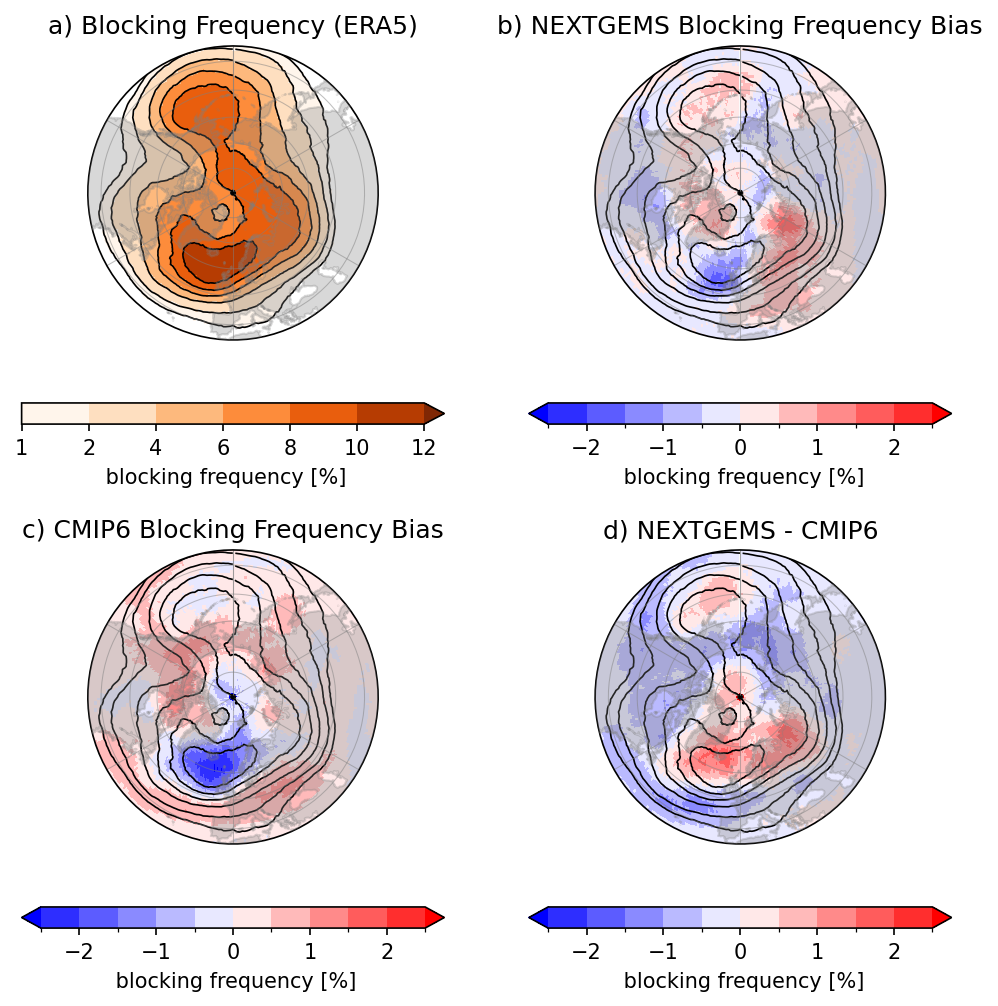

In [22]:
### plotting blocking frequency (in %) for winter over Northern Hemisphere
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.patches as mpatches
import matplotlib.path as mpath
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

### annual
mlevels=[1,2,4,6,8,10,12]
clevels=[-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5]

### winter
#mlevels=[1,2,4,6,8,10,12]
#clevels=[-5,-4,-3,-2,-1,0,1,2,3,4,5]

lonW=-180
lonE=180
latS=35
latN=90

### Compute a circle in axes coordinates, which we can use as a boundary
### for the map. We can pan/zoom as much as we like - the boundary will be
### permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8, 8), dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
#fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.Robinson()})
(acc_era5).plot(ax=ax1,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_era5).plot.contour(ax=ax1,colors='k', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
ax1.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree()); 
ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
#ax1.coastlines();
ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax1.set_boundary(circle, transform=ax1.transAxes)
ax1.set_title('a) Blocking Frequency (ERA5)')

(bias_ifs).plot(ax=ax2,levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_era5).plot.contour(ax=ax2,colors='k', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
ax2.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree()); 
ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
#ax2.coastlines();
ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax2.set_boundary(circle, transform=ax2.transAxes)
ax2.set_title('b) NEXTGEMS Blocking Frequency Bias')

(bias_cmip6).plot(ax=ax3,levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_era5).plot.contour(ax=ax3,colors='k', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
ax3.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree()); 
ax3.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
#ax3.coastlines();
ax3.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax3.set_boundary(circle, transform=ax3.transAxes)
ax3.set_title('c) CMIP6 Blocking Frequency Bias')

(sims_diff).plot(ax=ax4,levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_era5).plot.contour(ax=ax4,colors='k', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
ax4.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree()); 
ax4.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
#ax4.coastlines();
ax4.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax4.set_boundary(circle, transform=ax4.transAxes)
ax4.set_title('d) NEXTGEMS - CMIP6')

## Save
plt.savefig('IFS_block_bias_'+sufix+'_ens.jpg',bbox_inches='tight')

In [23]:
### plotting blocking frequency (in %) for global 
'''
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#ccrs.PlateCarree()
#mlevels=[1,2,3,4,5,6,7]
mlevels=[1,2,4,6,8]
clevels=[-3,-2,-1,0,1,2,3]

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10, 8),dpi=150, subplot_kw={'projection': ccrs.PlateCarree()})
#fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.Robinson()})
(acc_era5).plot(ax=ax1,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_era5).plot.contour(ax=ax1,colors='grey', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax1.coastlines();
ax1.set_title('Blocking Frequency (ERA5)')

(bias_ifs).plot(ax=ax2,levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_era5).plot.contour(ax=ax2,colors='grey', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax2.coastlines();
ax2.set_title('NEXTGEMS Blocking Frequency Bias')

(bias_cmip6).plot(ax=ax3,levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_era5).plot.contour(ax=ax3,colors='grey', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax3.coastlines();
ax3.set_title('CMIP6 Blocking Frequency Bias')

(sims_diff).plot(ax=ax4,levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_era5).plot.contour(ax=ax4,colors='grey', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
#ax4.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax4.coastlines();
ax4.set_global()
ax4.set_title('NEXTGEMS - CMIP6')
'''

"\nimport matplotlib.pyplot as plt\nimport cartopy.crs as ccrs\n\n#ccrs.PlateCarree()\n#mlevels=[1,2,3,4,5,6,7]\nmlevels=[1,2,4,6,8]\nclevels=[-3,-2,-1,0,1,2,3]\n\nfig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10, 8),dpi=150, subplot_kw={'projection': ccrs.PlateCarree()})\n#fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.Robinson()})\n(acc_era5).plot(ax=ax1,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})\n(acc_era5).plot.contour(ax=ax1,colors='grey', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())\n#ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); \nax1.coastlines();\nax1.set_title('Blocking Frequency (ERA5)')\n\n(bias_ifs).plot(ax=ax2,levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})\n(acc_

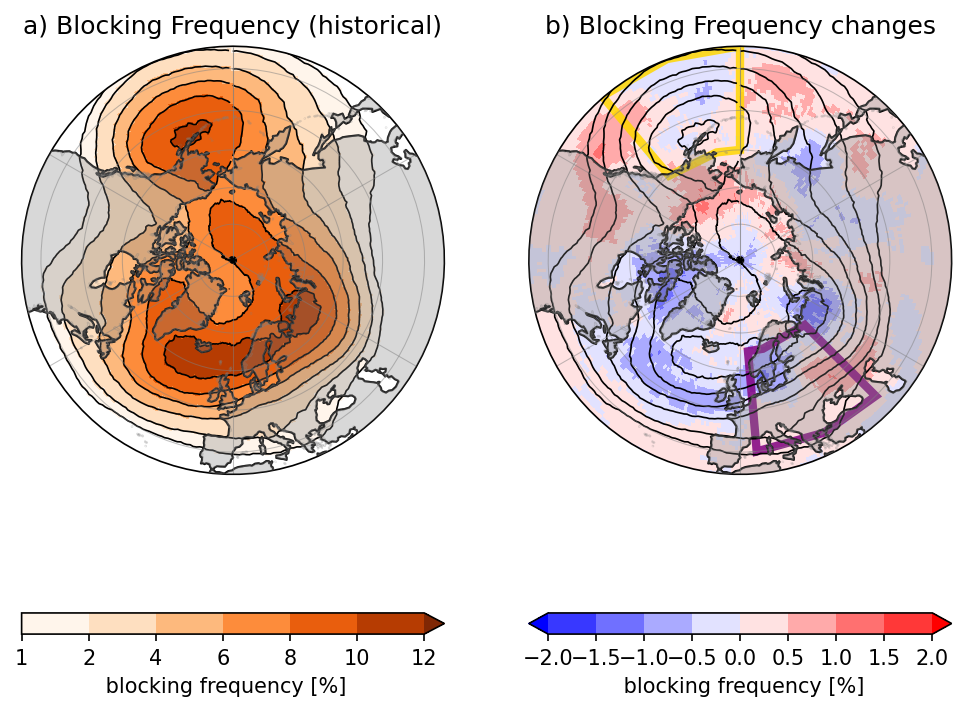

In [24]:
### climate chnange

### Compute a circle in axes coordinates, which we can use as a boundary
### for the map. We can pan/zoom as much as we like - the boundary will be
### permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

## fut
ifs_z500_day_fut=xr.open_dataset("/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z500_90th/BLOCKS-ifs-production-2020-2049.nc")

mlevels=[1,2,4,6,8,10,12]
clevels=[-2,-1.5,-1,-0.5,0,0.5,1,1.5,2]

lonW=-180
lonE=180
latS=35
latN=90

#### IFS
if sufix =='YEAR':
    blocks_ifs_fut=ifs_z500_day_fut
if sufix =='DJF':
    blocks_ifs_fut=ifs_z500_day_fut.sel(time=ifs_z500_day_fut.time.dt.month.isin([1, 2, 12]))
if sufix =='JJA':
    blocks_ifs_fut=ifs_z500_day_fut.sel(time=ifs_z500_day_fut.time.dt.month.isin([6, 7, 8]))

### sampling
#y0='2030' ## 2015, 2020, 2020, 2044
#yn='2049' ## 2019, 2049, 2025, 2049
#blocks_ifs_fut=blocks_ifs_fut.sel(time=slice(y0,yn))

### accumulate IFS 
ntime_ifs_fut =len(blocks_ifs_fut.time)
acc_ifs_fut = xr.where(blocks_ifs_fut['flag']>1,1,0).sum(dim='time')/ntime_ifs_fut*100

### change
change=  acc_ifs_fut - acc_ifs_his

#p=change.plot(subplot_kws=dict(projection=ccrs.PlateCarree(), facecolor="gray"),
#    transform=ccrs.PlateCarree(),cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
#p.axes.set_global()
#p.axes.coastlines()


fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8, 8), dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
#fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.Robinson()})
(acc_ifs_his).plot(ax=ax1,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_ifs_his).plot.contour(ax=ax1,colors='k', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
ax1.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree()); 
ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
ax1.coastlines();
ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax1.set_boundary(circle, transform=ax1.transAxes)
ax1.set_title('a) Blocking Frequency (historical)')
#ax1.add_patch(mpatches.Rectangle(xy=[5, 40], width=40, height=25,\
#                                 facecolor='none',alpha=0.85,edgecolor="blue",linewidth=4,transform=ccrs.PlateCarree()))
#ax1.add_patch(mpatches.Rectangle(xy=[-180, 35], width=40, height=25,\
#                                 facecolor='none',alpha=0.85,edgecolor="purple",linewidth=4,transform=ccrs.PlateCarree()))


(change).plot(ax=ax2,levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_ifs_his).plot.contour(ax=ax2,colors='k', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
ax2.set_extent([lonW, lonE, latS, latN], crs=ccrs.PlateCarree()); 
ax2.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='gray', alpha=0.5, linestyle='-')
ax2.coastlines();
ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)
ax2.set_boundary(circle, transform=ax2.transAxes)
ax2.set_title('b) Blocking Frequency changes')
ax2.add_patch(mpatches.Rectangle(xy=[5, 40], width=40, height=25,\
                                 facecolor='none',alpha=0.85,edgecolor="purple",linewidth=4,transform=ccrs.PlateCarree()))
ax2.add_patch(mpatches.Rectangle(xy=[-180, 35], width=40, height=25,\
                                 facecolor='none',alpha=0.85,edgecolor="gold",linewidth=4,transform=ccrs.PlateCarree()))


## Save
plt.savefig('IFS_block_chgs_'+sufix+'.jpg',bbox_inches='tight')

## Anlyzing outputs from IFS/ICON production runs

In [22]:
###IFS production
#blocks=xr.open_mfdataset("/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/BLOCKS-ifs-production-*.nc")
###ICON production
blocks=xr.open_mfdataset("/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z5002/BLOCKS-icon-ngc4008-*.nc")
###ERA5
#blocks=xr.open_mfdataset("/scratch/b/b382006/obs/era5/block/ANO_Z5002/BLOCKS-ERA5-*.nc")

In [23]:
y0='2021' ## 2015, 2020, 2021, 2044
yn='2025' ## 2019, 2049, 2025, 2049
sample=blocks.sel(time=slice(y0,yn))
sample

<xarray.Dataset>
Dimensions:    (lat: 181, lon: 360, time: 1826)
Coordinates:
  * lon        (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat        (lat) int64 90 89 88 87 86 85 84 ... -84 -85 -86 -87 -88 -89 -90
  * time       (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2025-12-31
    dayofyear  (time) int64 dask.array<chunksize=(1826,), meta=np.ndarray>
Data variables:
    flag       (time, lat, lon) int32 dask.array<chunksize=(1826, 181, 360), meta=np.ndarray>

In [24]:
# select only winter months January, February and December
### select seasons
sufix='summer'
if sufix=='winter':
    season=[10,11,12,1,2,3]
if sufix=='summer':
    season=[4,5,6,7,8,9]
    
##== annual
blocks_sims = sample
##==season
#blocks_sims = sample.sel(time=sample.time.dt.month.isin(season))

ntime_sims=len(blocks_sims.time)

### accumulate 
ntime_sims =len(blocks_sims.time)
acc_sims = xr.where(blocks_sims['flag']>1,1,0).sum(dim='time')/ntime_sims*100

In [26]:
###Save season as netcdf IFS
#acc_sims.to_netcdf('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_'+y0+'-'+yn+'.nc')
#acc_sims.to_netcdf('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_'+y0+'-'+yn+'_'+sufix+'.nc')

###Save season as netcdf ICON
#acc_sims.to_netcdf('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_'+y0+'-'+yn+'.nc')
#acc_sims.to_netcdf('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_'+y0+'-'+yn+'_'+sufix+'.nc')

###Save season as netcdf ERA5
#acc_sims.to_netcdf('/work/bm1235/b382006/era5/block/ANO_Z5002/Feq_BLOCKS-era5_'+y0+'-'+yn+'.nc')
#acc_sims.to_netcdf('/work/bm1235/b382006/era5/block/ANO_Z5002/Feq_BLOCKS-era5_'+y0+'-'+yn+'_'+sufix+'.nc')


/home/b/b382006/.conda/envs/contrack_dev/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/b/b382006/.conda/envs/contrack_dev/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/b/b382006/.conda/envs/contrack_dev/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/b/b382006/.co

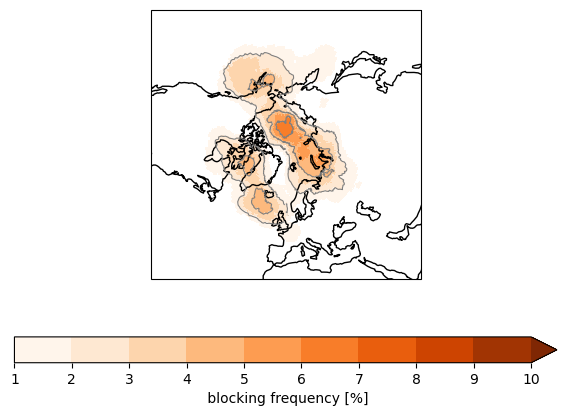

In [107]:
# plotting blocking frequency (in %) for winter over Northern Hemisphere
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.NorthPolarStereo()})
#fig, ax = plt.subplots(figsize=(7, 5), subplot_kw={'projection': ccrs.Robinson()})
(acc_sims).plot(levels=np.arange(1,11,1), cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal'})
(acc_sims).plot.contour(colors='grey', linewidths=0.8, levels=np.arange(2,18,2), transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); 
ax.coastlines();

In [5]:
## Make difference plot 
## ngc4008,IFS_9-FESOM_5-production
#model='ngc4008'

In [6]:
###difference |2044 to 2049 |2040 to 2044 | 2034 to 2039 |2030 to 2034 | 2025 to 2030 |
last0='2044'
lastn='2049'

In [7]:
### Load frequency
###IFS
#feq_ifs=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_2020-2049.nc').load()

feq_ifs_first=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_2021-2025.nc').load()
#feq_ifs_last=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_'+last0+'-'+lastn+'.nc').load()

#feq_ifs_first_djf=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_2020-2025_winter.nc').load()
#feq_ifs_last_djf=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_'+last0+'-'+lastn+'_winter.nc').load()

#feq_ifs_first_jja=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_2020-2025_summer.nc').load()
#feq_ifs_last_jja=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/Feq_BLOCKS-ifs-production_'+last0+'-'+lastn+'_summer.nc').load()

### ICON
#feq_icon=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_2020-2049.nc').load()

feq_icon_first=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_2021-2025.nc').load()
#feq_icon_last=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_'+last0+'-'+lastn+'.nc').load()

#feq_icon_first_djf=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_2020-2025_winter.nc').load()
#feq_icon_last_djf=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_'+last0+'-'+lastn+'_winter.nc').load()

#feq_icon_first_jja=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_2020-2025_summer.nc').load()
#feq_icon_last_jja=xr.open_dataset('/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z500/Feq_BLOCKS-ngc4008_'+last0+'-'+lastn+'_summer.nc').load()

### ERA5
feq_era5_last = xr.open_dataset('/work/bm1235/b382006/era5/block/ANO_Z5002/Feq_BLOCKS-era5_2015-2019.nc')

In [8]:
### Compute change
#chg_ifs =  feq_ifs_last - feq_ifs_first
#chg_ifs_djf =  feq_ifs_last_djf - feq_ifs_first_djf
#chg_ifs_jja =  feq_ifs_last_jja - feq_ifs_first_jja

#chg_icon =  feq_icon_last - feq_icon_first
#chg_icon_djf =  feq_icon_last_djf - feq_icon_first_djf
#chg_icon_jja =  feq_icon_last_jja - feq_icon_first_jja
#chg_icon_jja

/tmp/ipykernel_2205760/170912391.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


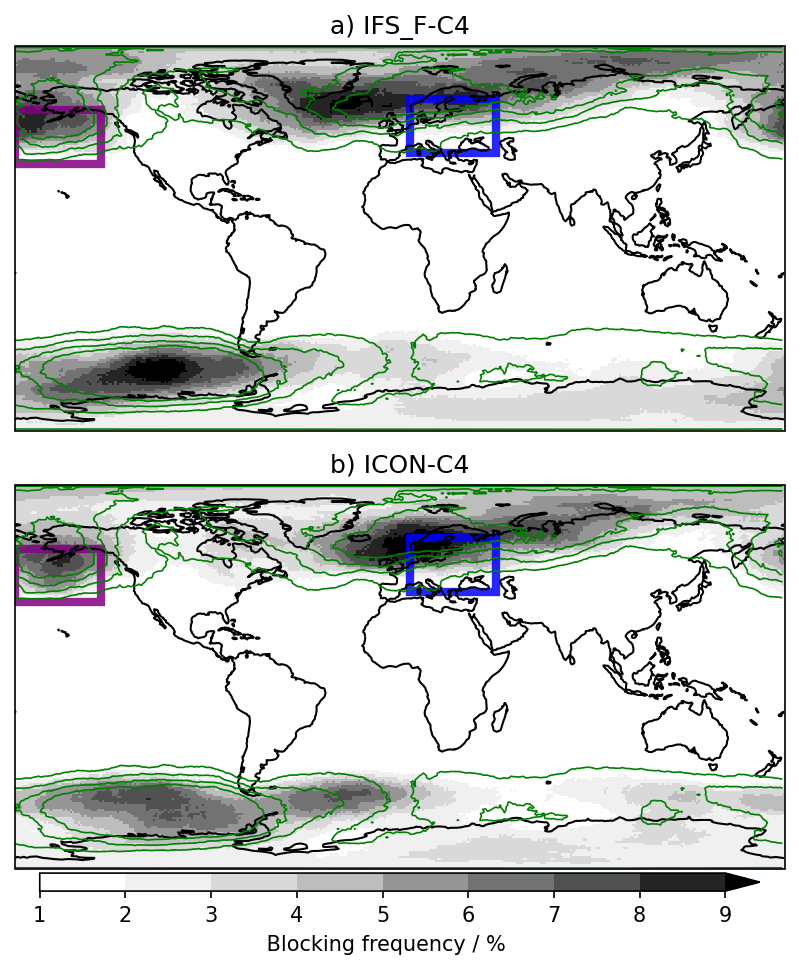

In [9]:
### changes
import matplotlib.patches as mpatches

#clevels=[-8,-6,-4,-2,-1,1,2,4,6,8]
clevels=np.arange(2,10,2)
mlevels=np.arange(1,10,1)
exts=[-180, 180, 30, 90]
###South
#clevels=[-5,-4,-3,-2,-1,0,1,2,3,4,5]
#mlevels=np.linspace(0,2,9)
#exts=[-180, 180, -30, -90]

fig, ((ax1),(ax2)) = plt.subplots(2, 1, figsize=(6, 6),dpi=150, subplot_kw={'projection': ccrs.PlateCarree()})
#fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(16, 12), subplot_kw={'projection': ccrs.SouthPolarStereo()})

###==== first panel
im=feq_ifs_first.flag.plot(ax=ax1,levels=mlevels, cmap='Greys', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_last.flag.plot.contour(ax=ax1,colors='g', linewidths=0.8, levels=clevels, transform=ccrs.PlateCarree())
#ax1.set_extent(exts, crs=ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('a) IFS_F-C4')
#ax1.coastlines(resolution='50m', color='grey', linestyle='-', alpha=1)
ax1.add_patch(mpatches.Rectangle(xy=[5, 40], width=40, height=25,\
                                 facecolor='none',alpha=0.85,edgecolor="blue",linewidth=4,transform=ccrs.PlateCarree()))
ax1.add_patch(mpatches.Rectangle(xy=[-180, 35], width=40, height=25,\
                                 facecolor='none',alpha=0.85,edgecolor="purple",linewidth=4,transform=ccrs.PlateCarree()))

###==== second panel
im=feq_icon_first.flag.plot(ax=ax2,levels=mlevels, cmap='Greys', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_era5_last.flag.plot.contour(ax=ax2,colors='g', linewidths=0.8, levels=clevels, transform=ccrs.PlateCarree())
#ax2.set_extent(exts, crs=ccrs.PlateCarree())
ax2.set_title('b) ICON-C4')
#ax2.coastlines(resolution='50m', color='grey', linestyle='-', alpha=1)
ax2.add_patch(mpatches.Rectangle(xy=[5, 40], width=40, height=25,\
                                 facecolor='none',alpha=0.85,edgecolor="blue",linewidth=4,transform=ccrs.PlateCarree()))
ax2.add_patch(mpatches.Rectangle(xy=[-180, 35], width=40, height=25,\
                                 facecolor='none',alpha=0.85,edgecolor="purple",linewidth=4,transform=ccrs.PlateCarree()))
ax2.coastlines()


###==== third panel
#im=feq_era5_last.flag.plot(ax=ax3,levels=mlevels, cmap='Oranges', extend = 'both', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': ' blocking frequency [%]','orientation':'horizontal','pad':0.01})
#feq_era5_last.flag.plot.contour(ax=ax3,colors='g', linewidths=0.8, levels=clevels, transform=ccrs.PlateCarree())
##ax3.set_extent(exts, crs=ccrs.PlateCarree())
#ax3.coastlines()
##ax3.set_title('b) IFS (2044 to 2049) - (2020 to 2025)')


#ax2.add_patch(mpatches.Rectangle(xy=[-5, 40], width=40, height=25,\
#                                 facecolor='none',alpha=0.85,edgecolor="purple",linewidth=2,transform=ccrs.PlateCarree())) 
#ax2.add_patch(mpatches.Rectangle(xy=[-185, 35], width=40, height=25,\
#                                 facecolor='none',alpha=0.85,edgecolor="yellow",linewidth=2,transform=ccrs.PlateCarree()))
# 

###=== Add colorbar
cbar_ax = fig.add_axes([0.1, 0.001, 0.8, 0.02])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, extend='max', orientation='horizontal')
cbar.set_label(' Blocking frequency / %')

fig.tight_layout()

#plt.savefig('IFS-production_changing.png')
plt.savefig('ICON+IFS-production_global.png',bbox_inches = 'tight')

In [7]:
from scipy.ndimage import gaussian_filter
import cartopy.util as cutil
import matplotlib.patches as mpatches
import matplotlib.path as mpath

### BIAS ifs
chg_ifs_fil = gaussian_filter(chg_ifs['flag'], sigma=0.5)
feq_ifs_first_fil = gaussian_filter(feq_ifs_first['flag'], sigma=1.0)
### BIAS icon
chg_icon_fil = gaussian_filter(chg_icon['flag'], sigma=0.5)
feq_icon_first_fil = gaussian_filter(feq_icon_first['flag'], sigma=1.0)

### fill gap
chg_ifs_new, clon = cutil.add_cyclic(chg_ifs_fil, chg_ifs.lon)
chg_icon_new, clon = cutil.add_cyclic(chg_icon_fil, chg_icon.lon)

### Compute a circle in axes coordinates, which we can use as a boundary
### for the map. We can pan/zoom as much as we like - the boundary will be
### permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

/tmp/ipykernel_494920/1837121192.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


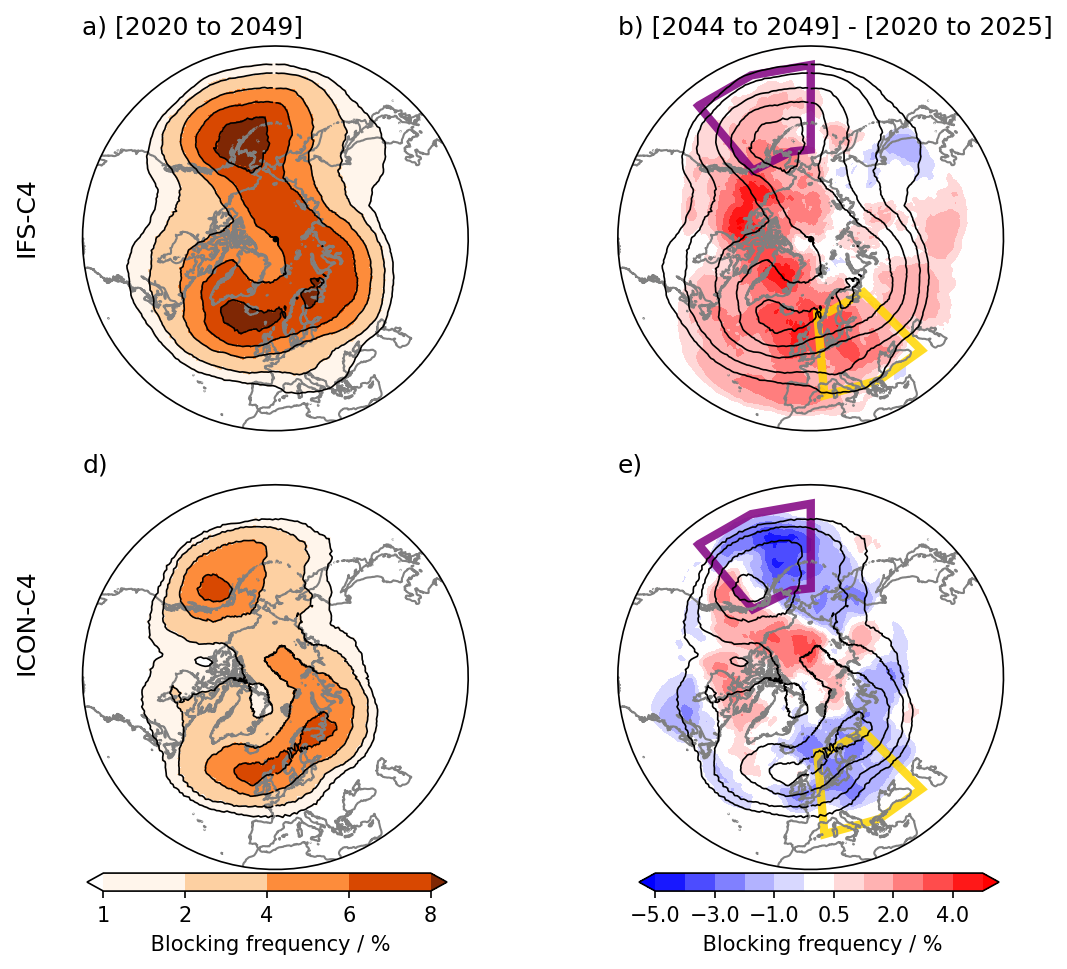

In [23]:
###
### changes
import matplotlib.patches as mpatches

#clevels=[-8,-6,-4,-2,-1,1,2,4,6,8]
clevels=[-5,-4,-3,-2,-1,-0.5,0.5,1,2,3,4,5]
#clevels=[-4,-3,-2,-1,-0.5,0.5,1,2,3,4]
#mlevels=[1,2,3,4,5,6,7]
mlevels=[1,2,4,6,8]

#fig, ax3 = plt.subplots(1, 3, figsize=(10, 6),dpi=150, subplot_kw={'projection': ccrs.SouthPolarStereo()})
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(8, 6),dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})

###=== first panel
#im =ax1.contourf(feq_ifs_first.lon, feq_ifs_first.lat,feq_ifs_first_fil, levels=mlevels,cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree())
#im0 =ax1.contour(feq_ifs_first.lon, feq_ifs_first.lat,feq_ifs_first_fil, colors='k', linewidths=1.2, levels=mlevels, transform=ccrs.PlateCarree())
im=feq_ifs.flag.plot(ax=ax1,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_ifs.flag.plot.contour(ax=ax1,colors='k', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
ax1.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax1.coastlines(resolution='50m', color='grey', linestyle='-', alpha=1)
ax1.set_boundary(circle, transform=ax1.transAxes)
#plt.colorbar(im, orientation='horizontal',ticklocation='auto',pad=0.01, aspect=40,label=' blocking frequency [%]')
#ax1.set_title(' [2020 to 2049]')
ax1.set_title('a) [2020 to 2049]',loc='left',fontsize=12)

fig.text(0.06, 0.75, 'IFS-C4', va='center', rotation='vertical',fontsize=12)

###==== second panel
im =ax2.contourf(clon, chg_ifs.lat,chg_ifs_new, levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree())
#im2 =ax2.contour(feq_ifs_first.lon, feq_ifs_first.lat,feq_ifs_first_fil, colors='k', linewidths=1.2, levels=mlevels, transform=ccrs.PlateCarree())
feq_ifs.flag.plot.contour(ax=ax2,colors='k', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
ax2.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax2.coastlines(resolution='50m', color='grey', linestyle='-', alpha=1)
ax2.add_patch(mpatches.Rectangle(xy=[5, 40], width=40, height=25,\
                                 facecolor='none',alpha=0.85,edgecolor="gold",linewidth=4,transform=ccrs.PlateCarree()))
ax2.add_patch(mpatches.Rectangle(xy=[-180, 35], width=40, height=25,\
                                 facecolor='none',alpha=0.85,edgecolor="purple",linewidth=4,transform=ccrs.PlateCarree()))
ax2.set_boundary(circle, transform=ax2.transAxes)
#plt.colorbar(im, orientation='horizontal',ticklocation='auto',pad=0.01, aspect=40,label=' blocking frequency [%]')
ax2.set_title('b) [2044 to 2049] - [2020 to 2025]',loc='left',fontsize=12)


###=== third panel
#im =ax3.contourf(feq_icon_first.lon, feq_icon_first.lat,feq_icon_first_fil, levels=mlevels,cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree())
#im0 =ax3.contour(feq_icon_first.lon, feq_icon_first.lat,feq_icon_first_fil, colors='k', linewidths=1.2, levels=mlevels, transform=ccrs.PlateCarree())
im=feq_icon.flag.plot(ax=ax3,levels=mlevels, cmap='Oranges', extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=False)
feq_icon.flag.plot.contour(ax=ax3,colors='k', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
ax3.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax3.coastlines(resolution='50m', color='grey', linestyle='-', alpha=1)
ax3.set_boundary(circle, transform=ax3.transAxes)
#plt.colorbar(im, orientation='horizontal',ticklocation='auto',pad=0.01, aspect=40,label=' blocking frequency [%]')
#ax3.set_title('ICON (2020 to 2049)')
ax3.set_title('d)',loc='left',fontsize=12)

###=== Add colorbar
cbar_ax = fig.add_axes([0.12, 0.001, 0.3, 0.02])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label(' Blocking frequency / %')

###=== fourth panel
im =ax4.contourf(clon, chg_icon.lat,chg_icon_new, levels=clevels, cmap='bwr', extend = 'both', transform=ccrs.PlateCarree())
#im3 =ax4.contour(feq_icon_first.lon, feq_icon_first.lat,feq_icon_first_fil, colors='k', linewidths=1.2, levels=mlevels, transform=ccrs.PlateCarree())
feq_icon.flag.plot.contour(ax=ax4,colors='k', linewidths=0.8, levels=mlevels, transform=ccrs.PlateCarree())
ax4.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree())
ax4.coastlines(resolution='50m', color='grey', linestyle='-', alpha=1)
ax4.add_patch(mpatches.Rectangle(xy=[5, 40], width=40, height=25,\
                                 facecolor='none',alpha=0.85,edgecolor="gold",linewidth=4,transform=ccrs.PlateCarree()))
ax4.add_patch(mpatches.Rectangle(xy=[-180, 35], width=40, height=25,\
                                 facecolor='none',alpha=0.85,edgecolor="purple",linewidth=4,transform=ccrs.PlateCarree()))
ax4.set_boundary(circle, transform=ax4.transAxes)
#plt.colorbar(im, orientation='horizontal',ticklocation='auto',pad=0.01, aspect=40,label=' blocking frequency [%]')
#ax4.set_title('ICON (2044 to 2049) - (2020 to 2025)')
ax4.set_title('e)',loc='left',fontsize=12)
fig.text(0.06, 0.30, 'ICON-C4', va='center', rotation='vertical',fontsize=12)

###=== Add colorbar
cbar_ax = fig.add_axes([0.58, 0.001, 0.3, 0.02])  # Left, bottom, width, height.
cbar = fig.colorbar(im, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label(' Blocking frequency / %')

fig.tight_layout()

#plt.savefig('IFS-production_changing_djf.png')
#plt.savefig('ICON-production_changing_jja.png')
plt.savefig('ICON+IFS-production_changing.png',bbox_inches = 'tight')

In [24]:
###european blocks
#sample=blocks_ifs.sel(lat=slice(40,65),lon=slice(-5,35))
#blocks_sims = sample

In [25]:
### time serie in a region
###european blocks
#sample=blocks_ifs.sel(lat=slice(40,65),lon=slice(-5,35))
###north pacific blocks
#sample=blocks_ifs.sel(lat=slice(35,60),lon=slice(-185,-145))
#tserie = xr.where(sample['flag']>1,1,0).sum(dim=['lon','lat']).compute()
#tserie

## Tracks

### Trends

In [27]:
################################
import glob
import pandas as pd
# Get CSV files list from a folder
#path = '/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002'
path = '/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002'
#path = '/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production-hist/block/ANO_Z500_90th'
'''
csv_files = sorted(glob.glob(path + "/*.csv"))

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)


#Loop to resample the flag 
accumulator = []
adj=0
for df in df_list:
    df['Flag']=df['Flag']+adj
    adj=df['Flag'].iloc[-1]

    accumulator.append(df)
    
ifs_df = pd.concat(accumulator)

'''
ifs_df = pd.read_csv(path+'/BLOCKS-ifs-production-1990-2019.csv')
ifs_df['year']=ifs_df.Date.str[:4]

In [28]:
#icon_df
#print(ifs_na)
#print(fit_fn_na)
#print(x_na)

#ifs_na.index[1:4] 
#fit_fn_na(x_na)

In [29]:
### Analysis

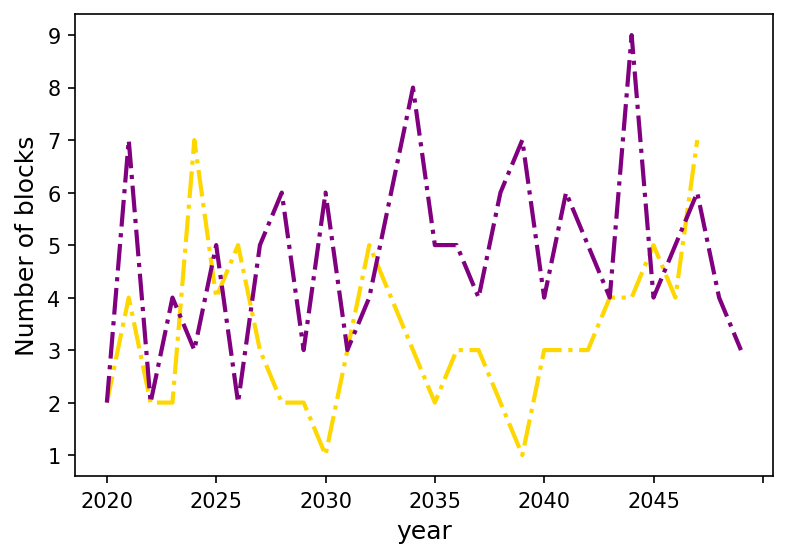

In [30]:
### take values in the northern hemosphere lat > 0
#ifs_df_td = ifs_df[(ifs_df['Latitude'] > 0 )]
###print(era5_df['Flag'].iloc[-1],icon_ngc2013_df['Flag'].iloc[-1],icon_ngc3028_df['Flag'].iloc[-1],IFS_4_FESOM_5_df['Flag'].iloc[-1],IFS_28_NEMO_25_df['Flag'].iloc[-1],cmip6_df['Flag'].iloc[-1])
##print(ifs_df['Flag'].nunique())
##print(ifs_df['Date'].nunique())

### Plotting 
### regions 
###xy=[5, 40], width=40, height=25,
###xy=[160, 50], width=30, height=25

### NA                                
ifs_df_na = ifs_df[(ifs_df['Latitude'] > 40 ) & (ifs_df['Latitude'] < 65 ) & (ifs_df['Longitude'] > 5 ) & (ifs_df['Longitude'] < 40 )]
### NP 
ifs_df_np = ifs_df[(ifs_df['Latitude'] > 50 ) & (ifs_df['Latitude'] < 75 ) & (ifs_df['Longitude'] > 160 ) & (ifs_df['Longitude'] < 180 )]
#ifs_df_td = ifs_df[(ifs_df['Latitude'] > 50 ) & (ifs_df['Latitude'] < 75 ) & (ifs_df['Longitude'] > 160 ) ]

##Grouping
ifs_na=ifs_df_na.groupby('year')['Flag'].nunique()
ifs_np=ifs_df_np.groupby('year')['Flag'].nunique()

###Fit function
x_np=np.arange(ifs_np.size)
fit=np.polyfit(x_np,ifs_np.values,1)
fit_fn_np=np.poly1d(fit)
x_na=np.arange(ifs_na.size)
fit=np.polyfit(x_na,ifs_na.values,1)
fit_fn_na=np.poly1d(fit)

### Plot
fig,ax=plt.subplots(figsize=(6, 4), dpi=150)
ifs_np.plot(color='gold', linestyle='-.',lw=2)
#plt.plot(ifs_np.index,fit_fn_np(x_np),color='purple',linestyle='-',lw=2)
ifs_na.plot(color='purple', linestyle='-.',lw=2)
#plt.plot(ifs_np.index,fit_fn_na(x_na)[0:-1],color='gold',linestyle='-',lw=2)
plt.ylabel('Number of blocks', fontsize=12)
plt.xlabel('year',fontsize=12)
#ax.xaxis.set_tick_params(labelsize=17)
#ax.yaxis.set_tick_params(labelsize=17)
plt.savefig('IFS-production_trend.png',bbox_inches='tight')

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


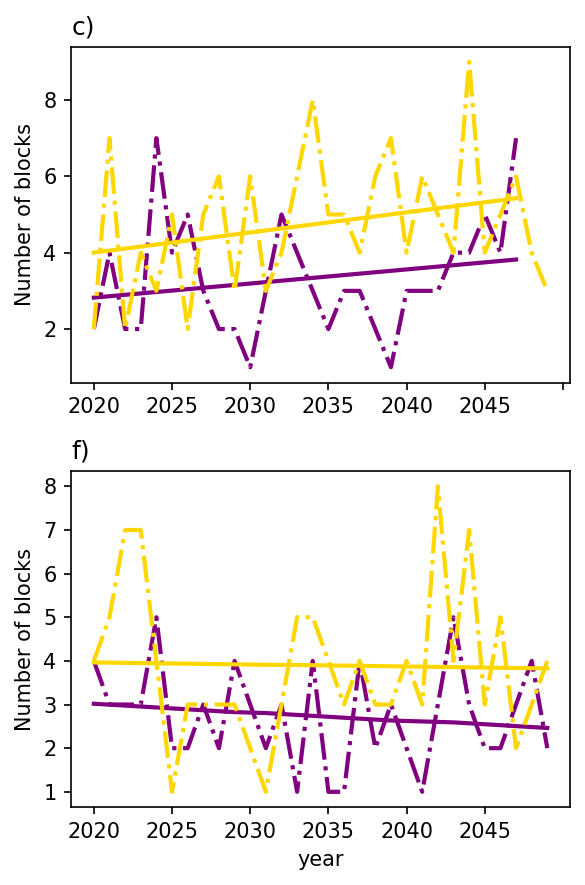

In [31]:
### ICON model
################################
import glob
import pandas as pd
# Get CSV files list from a folder
#path = '/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002'
path = "/scratch/b/b382006/nextgems/prefinal/ngc4008/block/ANO_Z5002"
'''
csv_files = sorted(glob.glob(path + "/*.csv"))

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)


#Loop to resample the flag 
accumulator = []
adj=0
for df in df_list:
    df['Flag']=df['Flag']+adj
    adj=df['Flag'].iloc[-1]

    accumulator.append(df)
    
icon_df = pd.concat(accumulator)
'''
icon_df = pd.read_csv(path+'/BLOCKS-icon-ngc4008-2020-2049.csv')
icon_df['year']=icon_df.Date.str[:4]

### take values in the northern hemosphere lat > 0
#icon_df_td = icon_df[(icon_df['Latitude'] > 0 )]

### NA                                
icon_df_na = icon_df[(icon_df['Latitude'] > 40 ) & (icon_df['Latitude'] < 65 ) & (icon_df['Longitude'] > 5 ) & (icon_df['Longitude'] < 40 )]
### NP 
icon_df_np = icon_df[(icon_df['Latitude'] > 50 ) & (icon_df['Latitude'] < 75 ) & (icon_df['Longitude'] > 160 ) & (icon_df['Longitude'] < 180 )]
#icon_df_td = icon_df[(icon_df['Latitude'] > 50 ) & (icon_df['Latitude'] < 75 ) & (icon_df['Longitude'] > 160 ) ]


##
##Grouping
icon_na=icon_df_na.groupby('year')['Flag'].nunique()
icon_np=icon_df_np.groupby('year')['Flag'].nunique()

###Fit function
x_np_icon=np.arange(icon_np.size)
fit_icon=np.polyfit(x_np_icon,icon_np.values,1)
fit_icon_np=np.poly1d(fit_icon)
x_na_icon=np.arange(icon_na.size)
fit_icon=np.polyfit(x_na_icon,icon_na.values,1)
fit_icon_na=np.poly1d(fit_icon)

### Plot
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(4, 6), dpi=150)

###IFS
ifs_np.plot(ax=ax1,color='purple', linestyle='-.',lw=2)
ax1.plot(ifs_np.index,fit_fn_np(x_np),color='purple',linestyle='-',lw=2)

ifs_na.plot(ax=ax1,color='gold', linestyle='-.',lw=2)
ax1.plot(ifs_np.index,fit_fn_na(x_na)[0:-2],color='gold',linestyle='-',lw=2)

ax1.set_title('c)',loc='left',fontsize=12)

###ICON
years=pd.to_numeric(icon_np.index, errors='coerce')
ax2.plot(years,icon_np.values,color='purple', linestyle='-.',lw=2)
ax2.plot(years,fit_icon_np(x_np_icon),color='purple',linestyle='-',lw=2)

years=pd.to_numeric(icon_na.index, errors='coerce')
ax2.plot(years,icon_na.values,color='gold', linestyle='-.',lw=2)
ax2.plot(years,fit_icon_na(x_na_icon),color='gold',linestyle='-',lw=2)

ax2.set_title('f)',loc='left',fontsize=12)

ax2.set_xticks([2020, 2025, 2030, 2035, 2040, 2045])

ax1.set_ylabel('Number of blocks')
ax2.set_ylabel('Number of blocks')

ax1.set_xlabel('')
ax2.set_xlabel('year')


#ax1.ylabel('Number of blocks', fontsize=17)
#ax1.xlabel('year',fontsize=17)

#ax1.xaxis.set_tick_params(labelsize=17)
#ax1.yaxis.set_tick_params(labelsize=17)

fig.tight_layout()

plt.savefig('IFS+ICON-production_trend.png')


In [32]:
new=icon_df_np.groupby('year')['Flag'].nunique()
import numpy as np

# Get the complete list of years
all_years = icon_df['year'].unique()
# Group by 'year' and count unique 'Flag' values
new = icon_df_np.groupby('year')['Flag'].nunique()
# Reindex to include all years, assigning NaN to those with no data
new = new.reindex(all_years, fill_value=np.nan)


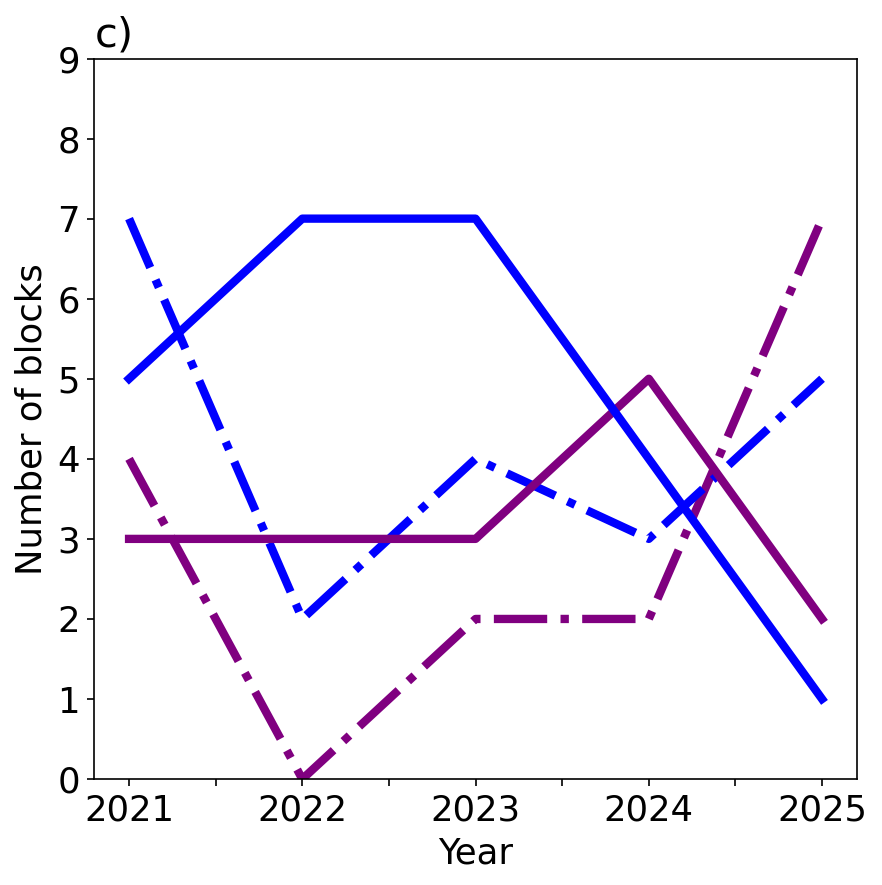

In [36]:
ifs_df = ifs_df[(ifs_df['year'] >= '2021') & (ifs_df['year'] <= '2025' )]
icon_df = icon_df[(icon_df['year'] >= '2021') & (icon_df['year'] <= '2025' )]
#icon_df_short
#ifs_df_short

### NA                                
ifs_df_na = ifs_df[(ifs_df['Latitude'] > 40 ) & (ifs_df['Latitude'] < 65 ) & (ifs_df['Longitude'] > 5 ) & (ifs_df['Longitude'] < 40 )]
### NP 
ifs_df_np = ifs_df[(ifs_df['Latitude'] > 50 ) & (ifs_df['Latitude'] < 75 ) & (ifs_df['Longitude'] > 160 ) & (ifs_df['Longitude'] < 180 )]
#ifs_df_td = ifs_df[(ifs_df['Latitude'] > 50 ) & (ifs_df['Latitude'] < 75 ) & (ifs_df['Longitude'] > 160 ) ]

##Grouping
ifs_na=ifs_df_na.groupby('year')['Flag'].nunique()
ifs_np=ifs_df_np.groupby('year')['Flag'].nunique()
# Get the complete list of years
all_years = ifs_df['year'].unique()
# Group by 'year' and count unique 'Flag' values
ifs_np = ifs_df_np.groupby('year')['Flag'].nunique()
# Reindex to include all years, assigning NaN to those with no data
ifs_np = ifs_np.reindex(all_years, fill_value=0)


### take values in the northern hemosphere lat > 0
#icon_df_td = icon_df[(icon_df['Latitude'] > 0 )]

### NA                                
icon_df_na = icon_df[(icon_df['Latitude'] > 40 ) & (icon_df['Latitude'] < 65 ) & (icon_df['Longitude'] > 5 ) & (icon_df['Longitude'] < 40 )]
### NP 
icon_df_np = icon_df[(icon_df['Latitude'] > 50 ) & (icon_df['Latitude'] < 75 ) & (icon_df['Longitude'] > 160 ) & (icon_df['Longitude'] < 180 )]
#icon_df_td = icon_df[(icon_df['Latitude'] > 50 ) & (icon_df['Latitude'] < 75 ) & (icon_df['Longitude'] > 160 ) ]


##
##Grouping
icon_na=icon_df_na.groupby('year')['Flag'].nunique()
#icon_np=icon_df_np.groupby('year')['Flag'].nunique()

# Get the complete list of years
all_years = icon_df['year'].unique()
# Group by 'year' and count unique 'Flag' values
icon_np = icon_df_np.groupby('year')['Flag'].nunique()
# Reindex to include all years, assigning NaN to those with no data
icon_np = icon_np.reindex(all_years, fill_value=0)


### Plot
fig,ax1=plt.subplots(1,1,figsize=(6, 6), dpi=150)

###IFS
ifs_np.plot(ax=ax1,color='purple', linestyle='-.',lw=4)
ifs_na.plot(ax=ax1,color='blue', linestyle='-.',lw=4)
ax1.set_title('c)',loc='left',fontsize=20)

icon_np.plot(ax=ax1,color='purple', linestyle='-',lw=4)
icon_na.plot(ax=ax1,color='blue', linestyle='-',lw=4)

ax1.set_ylabel('Number of blocks',fontsize=17)
ax1.set_xlabel('Year',fontsize=17)


ax1.xaxis.set_tick_params(labelsize=17)
ax1.yaxis.set_tick_params(labelsize=17)

ax1.set_ylim([0, 9])

fig.tight_layout()

plt.savefig('ICON+IFS-production_trend_5Y.png')



In [31]:
### Finding intense blockings
#ifs_yy.index

#years=pd.to_numeric(icon_np.index, errors='coerce')
#years
#icon_np.values
'''
import pandas as pd
###2021
block_df = pd.read_csv('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/BLOCKS-ifs-production-2040-2049.csv', delimiter=',',header=0)
###2022
#block_df =  pd.read_csv('/work/bm1235/b382006/regridding/cycle3/ngc3028/block/ANO_Z500/BLOCKS-icon-ngc3028-2022.csv', delimiter=',',header=0)
### Find bid (flag of most intense blockings) 
block_df.loc[block_df['Intensity'].nlargest(35).index]

#bid=9530
#bid=3117
bid=6908

mdate = timb[0:4] + timb[5:7] + timb[8:10] + '_' + timb[11:13]
lonts = np.asarray(block_df['Longitude'].iloc[np.where(block_df['Flag']==bid)])
latts = np.asarray(block_df['Latitude'].iloc[np.where(block_df['Flag']==bid)])
dates = np.asarray(block_df['Date'].iloc[np.where(block_df['Flag']==bid)]) #'20210326_12'
lonts[lonts <= 0] = lonts+360
dates

print(mdate)
#2044-01-16T12:00
block_df['Flag'].iloc[np.where(block_df['Date']==mdate)]
'''

"\nimport pandas as pd\n###2021\nblock_df = pd.read_csv('/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z5002/BLOCKS-ifs-production-2040-2049.csv', delimiter=',',header=0)\n###2022\n#block_df =  pd.read_csv('/work/bm1235/b382006/regridding/cycle3/ngc3028/block/ANO_Z500/BLOCKS-icon-ngc3028-2022.csv', delimiter=',',header=0)\n### Find bid (flag of most intense blockings) \nblock_df.loc[block_df['Intensity'].nlargest(35).index]\n\n#bid=9530\n#bid=3117\nbid=6908\n\nmdate = timb[0:4] + timb[5:7] + timb[8:10] + '_' + timb[11:13]\nlonts = np.asarray(block_df['Longitude'].iloc[np.where(block_df['Flag']==bid)])\nlatts = np.asarray(block_df['Latitude'].iloc[np.where(block_df['Flag']==bid)])\ndates = np.asarray(block_df['Date'].iloc[np.where(block_df['Flag']==bid)]) #'20210326_12'\nlonts[lonts <= 0] = lonts+360\ndates\n\nprint(mdate)\n#2044-01-16T12:00\nblock_df['Flag'].iloc[np.where(block_df['Date']==mdate)]\n"

### Persistence presennt-day

In [1]:
################################
import glob
import pandas as pd
# Get CSV files list from a folder
###IFS
file = '/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production-hist/block/ANO_Z500_90th/BLOCKS-ifs-production-1990-2019.csv'
ifs_df = pd.read_csv(file)
ifs_df['year']=ifs_df.Date.str[:4]

##ERA5
file = '/scratch/b/b382006/obs/era5/block/ANO_Z500_90th/BLOCKS-ERA5-1990-2019.csv'
era5_df = pd.read_csv(file)
era5_df['year']=era5_df.Date.str[:4]


In [2]:
import glob
import pandas as pd
import numpy as np

models = [
    'MRI-ESM2-0',
    'ACCESS-CM2',
    'EC-Earth3',
    'MPI-ESM1-2-HR',
    'CESM2-WACCM', 
    'MIROC6',
    'MPI-ESM1-2-LR',
    'CESM2'
]

base_path = '/scratch/b/b382006/cmip6/'

# Initialize an empty list to collect the arrays
all_values = []

# Loop through each model and process its data
for model in models:
    if model=='MRI-ESM2-0':
        file = f'{base_path}{model}/r1i1p1f1/block/ANO_Z500_90th/BLOCKS-cmip6-1969-2000.csv'
    elif model=='CESM2':
        file = f'{base_path}{model}/r11i1p1f1/block/ANO_Z500_90th/BLOCKS-cmip6-1985-2014.csv'
    else:
        file = f'{base_path}{model}/r1i1p1f1/block/ANO_Z500_90th/BLOCKS-cmip6-1985-2014.csv'
    cmip_df = pd.read_csv(file)
    cmip_df['year'] = cmip_df['Date'].str[:4]
    cmip_df = cmip_df[cmip_df['Latitude'] > 0]
    unique_flags = cmip_df.groupby('year')['Flag'].nunique().values
    all_values.append(unique_flags)

# Concatenate all arrays into a single array
cmip_dfs = np.concatenate(all_values)
print(cmip_dfs)


[30 31 33 38 32 26 32 30 29 30 31 36 32 31 35 30 30 40 19 22 34 33 26 28
 28 41 25 27 33 38 26 29 31 36 30 39 29 44 26 30 29 35 31 28 34 31 33 37
 30 28 36 27 27 33 34 24 34 31 36 32 29 26 35 28 36 29 19 28 30 29 29 27
 23 33 33 27 40 38 35 30 42 32 29 29 32 29 30 29 32 32 30 19 26 29 27 29
 33 33 42 31 30 27 30 30 29 28 29 25 38 29 31 36 39 37 35 35 38 31 29 27
 27 28 30 28 40 35 34 24 34 25 27 34 27 18 26 27 16 28 29 23 33 26 33 22
 26 32 27 26 29 20 34 31 36 28 26 34 30 31 30 36 28 33 33 28 24 29 29 31
 38 34 34 35 34 25 31 23 34 30 34 27 33 39 42 24 26 24 31 29 26 24 31 37
 33 35 37 32 37 26 34 32 30 32 38 36 28 32 31 34 30 27 24 24 25 24 26 29
 31 36 25 15 26 28 26 31 26 27 22 32 27 28 36 27 28 27 34 24 30 28 36 28
 32 34]


In [3]:
### take values in the northern hemosphere lat > 0 
ifs_df = ifs_df[(ifs_df['Latitude'] > 0 )]
era5_df = era5_df[(era5_df['Latitude'] > 0 )]
###cmip6_df
##print(era5_df['Flag'].iloc[-1],ifs_df['Flag'].iloc[-1],icon_ngc3028_df['Flag'].iloc[-1],IFS_4_FESOM_5_df['Flag'].iloc[-1],IFS_28_NEMO_25_df['Flag'].iloc[-1],cmip6_df['Flag'].iloc[-1])
print(era5_df['Flag'].nunique(),ifs_df['Flag'].nunique())
print(era5_df['Date'].nunique(),ifs_df['Date'].nunique())


917 860
7520 7384


In [4]:
###cmip_df1_values

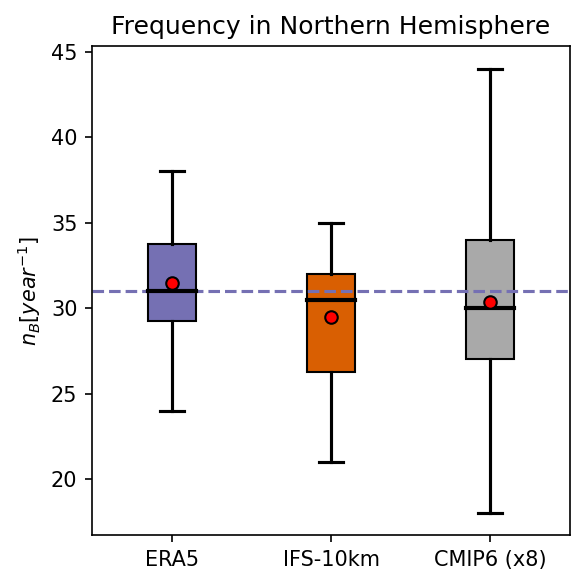

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Color definitions
color_ifs = '#d95f02'
color_icon = '#1b9e77'
color_era5 = '#7570b3'
color_cmip6 = 'darkgrey'

# Sample DataFrame simulation
# Replace this with your actual DataFrame values
era5_values = era5_df.groupby('year')['Flag'].nunique().values
ifs_values = ifs_df.groupby('year')['Flag'].nunique().values
#cesm2_values = cesm2_df.groupby('year')['Flag'].nunique().values

#data = [era5_values, ifs_values, cesm2_values]
data = [era5_values, ifs_values, cmip_dfs]
labels = ['ERA5', 'IFS-10km', 'CMIP6 (x8)']
colors = [color_era5, color_ifs, color_cmip6]

fig, ax = plt.subplots(figsize=(4, 4), dpi=150)

# Boxplot configuration
boxprops = dict(facecolor='white', color='black')  # White box with black borders
medianprops = dict(color='black', linewidth=2)  # Median line
whiskerprops = dict(color='black', linewidth=1.5)  # Whiskers
capprops = dict(color='black', linewidth=1.5)  # Caps on whiskers

# Plot boxplot
bplot = ax.boxplot(data, patch_artist=True, labels=labels, 
                   boxprops=boxprops, medianprops=medianprops,
                   whiskerprops=whiskerprops, capprops=capprops, showmeans=True,showfliers=False,
                   meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=6))

# Custom colors for boxes
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Calculate and add a horizontal line at the mean of era5_df
mean_era5 = np.median(era5_values)
ax.axhline(mean_era5, color=color_era5, linestyle='--', linewidth=1.5, label=f'ERA5 Mean ({mean_era5:.2f})')


ax.set_ylabel('$n_{B}$[$year^{-1}$]')
ax.set_title('Frequency in Northern Hemisphere')

plt.tight_layout()
plt.savefig('number-blocks_NH.jpg')
plt.show()


In [80]:
### persistence
# Initialize an empty list to collect the arrays
all_values = []

# Loop through each model and process its data
for model in models:
    if model=='MRI-ESM2-0':
        file = f'{base_path}{model}/r1i1p1f1/block/ANO_Z500_90th/BLOCKS-cmip6-1969-2000.csv'
    elif model=='CESM2':
        file = f'{base_path}{model}/r11i1p1f1/block/ANO_Z500_90th/BLOCKS-cmip6-1985-2014.csv'
    else:
        file = f'{base_path}{model}/r1i1p1f1/block/ANO_Z500_90th/BLOCKS-cmip6-1985-2014.csv'
    cmip_df = pd.read_csv(file)
    cmip_df['year'] = cmip_df['Date'].str[:4]
    cmip_df = cmip_df[cmip_df['Latitude'] > 0]
    unique_flags=pd.DataFrame(cmip_df.groupby('Flag').size(), columns=['Duration']) 
#    unique_flags = cmip_df.groupby('year')['Flag'].nunique().values
    all_values.append(unique_flags)

# Concatenate all DataFrames into a single DataFrame
cmip_dfs = pd.concat(all_values).reset_index()


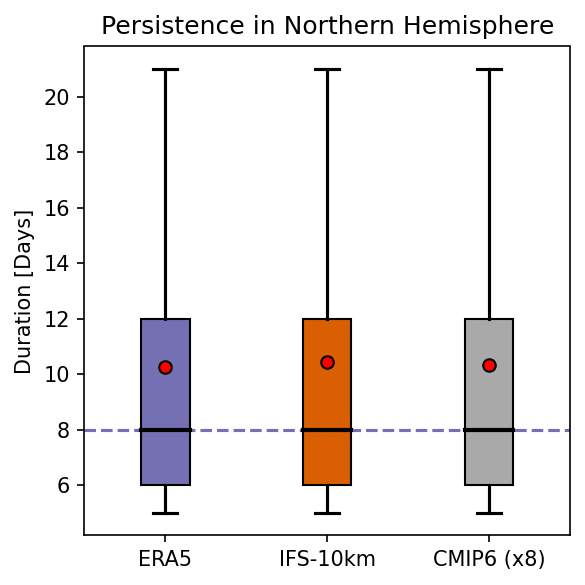

In [81]:
### group by duration
era5_values=pd.DataFrame(era5_df.groupby('Flag').size(), columns=['Duration']).reset_index() #.assign(Location=2)

ifs_values=pd.DataFrame(ifs_df.groupby('Flag').size(), columns=['Duration']).reset_index() #.assign(Location=2)

data = [era5_values['Duration'].values, ifs_values['Duration'].values, cmip_dfs['Duration'].values]
labels = ['ERA5', 'IFS-10km', 'CMIP6 (x8)']
colors = [color_era5, color_ifs, color_cmip6]

fig, ax = plt.subplots(figsize=(4, 4), dpi=150)

# Boxplot configuration
boxprops = dict(facecolor='white', color='black')  # White box with black borders
medianprops = dict(color='black', linewidth=2)  # Median line
whiskerprops = dict(color='black', linewidth=1.5)  # Whiskers
capprops = dict(color='black', linewidth=1.5)  # Caps on whiskers

# Plot boxplot
bplot = ax.boxplot(data, patch_artist=True, labels=labels, 
                   boxprops=boxprops, medianprops=medianprops,
                   whiskerprops=whiskerprops, capprops=capprops, showmeans=True, showfliers=False,
                   meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=6))

# Custom colors for boxes
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Calculate and add a horizontal line at the mean of era5_df
mean_era5 = np.median(era5_values['Duration'].values)
ax.axhline(mean_era5, color=color_era5, linestyle='--', linewidth=1.5, label=f'ERA5 Mean ({mean_era5:.2f})')


ax.set_ylabel('Duration [Days]')
ax.set_title('Persistence in Northern Hemisphere')

plt.tight_layout()
plt.savefig('duration-blocks_NH.jpg')
plt.show()



In [82]:
### Size
# Initialize an empty list to collect the arrays
all_values = []

# Loop through each model and process its data
for model in models:
    if model=='MRI-ESM2-0':
        file = f'{base_path}{model}/r1i1p1f1/block/ANO_Z500_90th/BLOCKS-cmip6-1969-2000.csv'
    elif model=='CESM2':
        file = f'{base_path}{model}/r11i1p1f1/block/ANO_Z500_90th/BLOCKS-cmip6-1985-2014.csv'
    else:
        file = f'{base_path}{model}/r1i1p1f1/block/ANO_Z500_90th/BLOCKS-cmip6-1985-2014.csv'
    cmip_df = pd.read_csv(file)
    cmip_df['year'] = cmip_df['Date'].str[:4]
    cmip_df = cmip_df[cmip_df['Latitude'] > 0]
    unique_flags=pd.DataFrame(cmip_df.groupby('Flag').size(), columns=['Duration']) 
#    unique_flags = cmip_df.groupby('year')['Flag'].nunique().values
    all_values.append(cmip_df['Size'])

# Concatenate all DataFrames into a single DataFrame
cmip_dfs = pd.concat(all_values).reset_index()

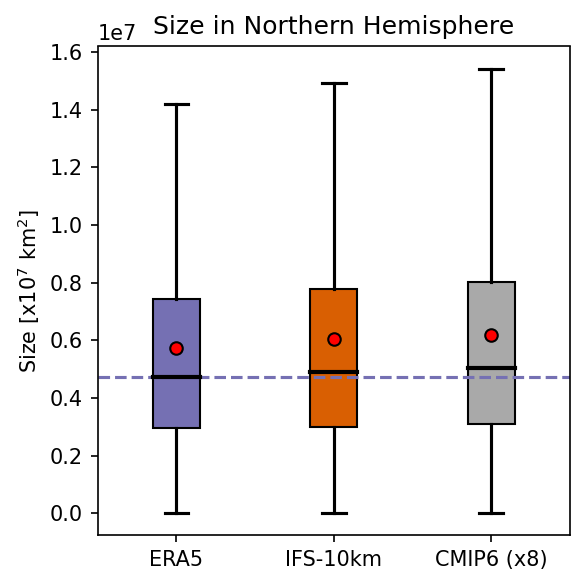

In [83]:
###era5_df_reset=era5_df.reset_index(drop=True)

### Take size (maybe only > 2×10^6 km2 )
era5_filtered = era5_df[era5_df['Size'] > 2000000].reset_index(drop=True)
ifs_filtered = ifs_df[ifs_df['Size'] > 2000000].reset_index(drop=True)
cmip_filtered = cmip_dfs[cmip_dfs['Size'] > 2000000].reset_index(drop=True)

data = [era5_df['Size'], ifs_df['Size'], cmip_dfs['Size']]
#data = [era5_filtered['Size'], ifs_filtered['Size'], cmip_filtered['Size']]
labels = ['ERA5', 'IFS-10km', 'CMIP6 (x8)']
colors = [color_era5, color_ifs, color_cmip6]

fig, ax = plt.subplots(figsize=(4, 4), dpi=150)

# Boxplot configuration
boxprops = dict(facecolor='white', color='black')  # White box with black borders
medianprops = dict(color='black', linewidth=2)  # Median line
whiskerprops = dict(color='black', linewidth=1.5)  # Whiskers
capprops = dict(color='black', linewidth=1.5)  # Caps on whiskers

# Plot boxplot
bplot = ax.boxplot(data, patch_artist=True, labels=labels, 
                   boxprops=boxprops, medianprops=medianprops,
                   whiskerprops=whiskerprops, capprops=capprops, showmeans=True, showfliers=False,
                   meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=6))

# Custom colors for boxes
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Calculate and add a horizontal line at the mean of era5_df
mean_era5 = np.median(era5_df['Size'])
ax.axhline(mean_era5, color=color_era5, linestyle='--', linewidth=1.5, label=f'ERA5 Mean ({mean_era5:.2f})')


ax.set_ylabel('Size [x10$^7$ km$^2$]')
ax.set_title('Size in Northern Hemisphere')

plt.tight_layout()
plt.savefig('size-blocks_NH.jpg')
plt.show()



In [78]:
###CLIMATE CHANGE

In [6]:
################################
import glob
import pandas as pd
# Get CSV files list from a folder
###IFS historical
file = '/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production-hist/block/ANO_Z500_90th/BLOCKS-ifs-production-1990-2019.csv'
ifs_df_his = pd.read_csv(file)
ifs_df_his['year']=ifs_df_his.Date.str[:4]

##IFS  future
file = '/scratch/b/b382006/nextgems/prefinal/IFS_9-FESOM_5-production/block/ANO_Z500_90th/BLOCKS-ifs-production-2020-2049.csv'
ifs_df_fut = pd.read_csv(file)
ifs_df_fut['year']=ifs_df_fut.Date.str[:4]

### take values in the northern hemosphere lat > 0 
ifs_df_his = ifs_df_his[(ifs_df_his['Latitude'] > 0 )]
ifs_df_fut = ifs_df_fut[(ifs_df_fut['Latitude'] > 0 )]

###cmip6_df
##print(era5_df['Flag'].iloc[-1],ifs_df['Flag'].iloc[-1],icon_ngc3028_df['Flag'].iloc[-1],IFS_4_FESOM_5_df['Flag'].iloc[-1],IFS_28_NEMO_25_df['Flag'].iloc[-1],cmip6_df['Flag'].iloc[-1])
print(ifs_df_his['Flag'].nunique(),ifs_df_fut['Flag'].nunique())
print(ifs_df_his['Date'].nunique(),ifs_df_fut['Date'].nunique())

860 825
7384 7152


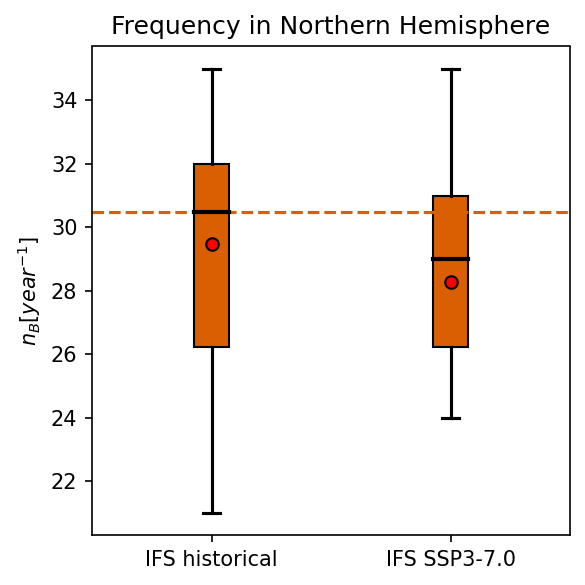

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Color definitions
color_ifs = '#d95f02'
color_icon = '#1b9e77'
color_era5 = '#7570b3'
color_cmip6 = 'darkgrey'

# Sample DataFrame simulation
# Replace this with your actual DataFrame values
ifs_values_his = ifs_df_his.groupby('year')['Flag'].nunique().values
ifs_values_fut = ifs_df_fut.groupby('year')['Flag'].nunique().values


data = [ifs_values_his, ifs_values_fut]
labels = ['IFS historical', 'IFS SSP3-7.0']
colors = [color_ifs, color_ifs]

fig, ax = plt.subplots(figsize=(4, 4), dpi=150)

# Boxplot configuration
boxprops = dict(facecolor='white', color='black')  # White box with black borders
medianprops = dict(color='black', linewidth=2)  # Median line
whiskerprops = dict(color='black', linewidth=1.5)  # Whiskers
capprops = dict(color='black', linewidth=1.5)  # Caps on whiskers

# Plot boxplot
bplot = ax.boxplot(data, patch_artist=True, labels=labels, 
                   boxprops=boxprops, medianprops=medianprops,
                   whiskerprops=whiskerprops, capprops=capprops, showmeans=True, showfliers=False,
                   meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=6))

# Custom colors for boxes
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Calculate and add a horizontal line at the mean of era5_df
mean_ifs = np.median(ifs_values_his)
ax.axhline(mean_ifs, color=color_ifs, linestyle='--', linewidth=1.5, label=f'ERA5 Mean ({mean_ifs:.2f})')


ax.set_ylabel('$n_{B}$[$year^{-1}$]')
ax.set_title('Frequency in Northern Hemisphere')

plt.tight_layout()
plt.savefig('number-blocks_NH_chgs.jpg')
#plt.show()

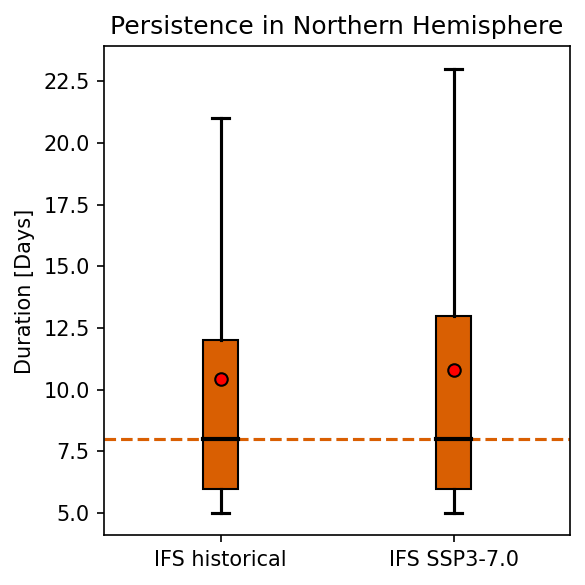

In [90]:
### group by duration

ifs_values_his=pd.DataFrame(ifs_df_his.groupby('Flag').size(), columns=['Duration']) #.assign(Location=2)
ifs_values_fut=pd.DataFrame(ifs_df_fut.groupby('Flag').size(), columns=['Duration']) #.assign(Location=2)



#data = [era5_values['Duration'], ifs_values['Duration'], cesm2_values['Duration']]
data = [ifs_values_his['Duration'], ifs_values_fut['Duration']]
labels = ['IFS historical', 'IFS SSP3-7.0']
colors = [color_ifs, color_ifs]

fig, ax = plt.subplots(figsize=(4, 4), dpi=150)

# Boxplot configuration
boxprops = dict(facecolor='white', color='black')  # White box with black borders
medianprops = dict(color='black', linewidth=2)  # Median line
whiskerprops = dict(color='black', linewidth=1.5)  # Whiskers
capprops = dict(color='black', linewidth=1.5)  # Caps on whiskers

# Plot boxplot
bplot = ax.boxplot(data, patch_artist=True, labels=labels, 
                   boxprops=boxprops, medianprops=medianprops,
                   whiskerprops=whiskerprops, capprops=capprops, showmeans=True, showfliers=False,
                   meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=6))

# Custom colors for boxes
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Calculate and add a horizontal line at the mean of era5_df
mean_ifs = np.median(ifs_values_his)
ax.axhline(mean_ifs, color=color_ifs, linestyle='--', linewidth=1.5, label=f'ERA5 Mean ({mean_ifs:.2f})')


ax.set_ylabel('Duration [Days]')
ax.set_title('Persistence in Northern Hemisphere')

plt.tight_layout()
plt.savefig('duration-blocks_NH_chgs.jpg')
#plt.show()

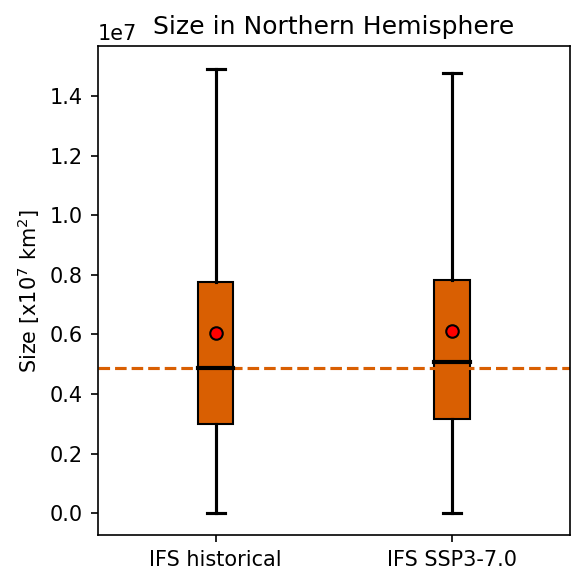

In [7]:
data = [ifs_df_his['Size'], ifs_df_fut['Size']]

labels = ['IFS historical', 'IFS SSP3-7.0']
colors = [color_ifs, color_ifs]

fig, ax = plt.subplots(figsize=(4, 4), dpi=150)

# Boxplot configuration
boxprops = dict(facecolor='white', color='black')  # White box with black borders
medianprops = dict(color='black', linewidth=2)  # Median line
whiskerprops = dict(color='black', linewidth=1.5)  # Whiskers
capprops = dict(color='black', linewidth=1.5)  # Caps on whiskers

# Plot boxplot
bplot = ax.boxplot(data, patch_artist=True, labels=labels, 
                   boxprops=boxprops, medianprops=medianprops,
                   whiskerprops=whiskerprops, capprops=capprops, showmeans=True, showfliers=False,
                   meanprops=dict(marker='o', markerfacecolor='red', markeredgecolor='black', markersize=6))

# Custom colors for boxes
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

# Calculate and add a horizontal line at the mean of era5_df
mean_ifs = np.median(ifs_df_his['Size'])
ax.axhline(mean_ifs, color=color_ifs, linestyle='--', linewidth=1.5, label=f'ERA5 Mean ({mean_ifs:.2f})')


ax.set_ylabel('Size [x10$^7$ km$^2$]')
ax.set_title('Size in Northern Hemisphere')

plt.tight_layout()
plt.savefig('size-blocks_NH_chgs.jpg')
#plt.show()

## Plot a case

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import matplotlib.cm as cm
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cf
from scipy.interpolate import CloughTocher2DInterpolator, LinearNDInterpolator, NearestNDInterpolator
import gribscan
import intake
import eccodes
import healpy as hp
import os

/home/b/b382006/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [44]:
cat = intake.open_catalog("https://data.nextgems-h2020.eu/catalog.yaml")

In [45]:
# which IFS experiments are available?
print(list(cat.IFS))

['IFS_9-FESOM_5-production', 'IFS_4.4-FESOM_5-cycle3', 'IFS_9-FESOM_5-cycle3', 'IFS_9-NEMO_25-cycle3', 'IFS_28-NEMO_25-cycle3', 'IFS_28-FESOM_25-cycle3', 'IFS_4.4-FESOM_5-cycle3-nofastdata', 'IFS_4.4-FESOM_5-cycle3-fastdata', 'IFS_grids']


In [46]:
### select simulation / prefix
ifs_run='IFS_9-FESOM_5-production'
print(list(cat.IFS[ifs_run]))

['2D_hourly_healpix512', '2D_hourly_healpix512_2020s', '2D_hourly_healpix512_2030s', '2D_hourly_healpix512_2040s', '2D_daily_healpix512_ocean', '3D_hourly_healpix512', '3D_hourly_healpix512_2020', '3D_hourly_healpix512_2025', '3D_hourly_healpix512_2030', '3D_hourly_healpix512_2035', '3D_hourly_healpix512_2040', '3D_hourly_healpix512_2045', '3D_hourly_healpix512_snow', '3D_daily_healpix512_ocean', '2D_monthly_healpix512', '2D_monthly_healpix512_sst_ci_winds', '3D_monthly_healpix512', '3D_monthly_healpix512_snow', '2D_hourly_healpix128', '3D_hourly_healpix128_2020', '3D_hourly_healpix128_2025', '3D_hourly_healpix128_2030', '3D_hourly_healpix128_2035', '3D_hourly_healpix128_2040', '3D_hourly_healpix128_2045', '2D_daily_healpix128_ocean', '3D_daily_healpix128_ocean', '3D_hourly_0.25deg_2020s', '3D_hourly_0.25deg_2030s', '3D_hourly_0.25deg_2040s', '3D_hourly_native_2020s', '3D_hourly_native_2030s', '2D_monthly_0.25deg', '2D_monthly_0.25deg_snow', '2D_monthly_0.25deg_sst_ci_winds', '3D_month

In [47]:
###Load more data
lon = np.linspace(-179, 180, 360)
lat = np.linspace(-90, 90, 181)
lon2, lat2 = np.meshgrid(lon, lat)

#data = cat.IFS['IFS_9-FESOM_5-production']['3D_hourly_healpix512_2040'].to_dask()
data = cat.IFS['IFS_9-FESOM_5-production']['2D_hourly_healpix512_2040s'].to_dask()
data

#data_example = data['z'][-1,:].sel(level=500)
#
#pix = hp.ang2pix(
#        hp.npix2nside(len(data_example)), theta=lon2, phi=lat2, nest=True, lonlat=True
#    )

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


<xarray.Dataset>
Dimensions:  (time: 87682, value: 3145728)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(3145728,), meta=np.ndarray>
    lon      (value) float64 dask.array<chunksize=(3145728,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2040-01-01 2040-01-01T01:00:00 ... 2050-01-01
Dimensions without coordinates: value
Data variables: (12/57)
    10u      (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    10v      (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2d       (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    2t       (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    blh      (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    chnk     (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ...       ...
    tp       (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tprate   (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsr      (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    tsrc     (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttr      (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
    ttrc     (time, value) float64 dask.array<chunksize=(1, 3145728), meta=np.ndarray>
Attributes:
    edition:            2
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          1003
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

In [48]:
data_example = data['tp'].sel(time=timb)

pix = hp.ang2pix(
        hp.npix2nside(len(data_example)), theta=lon2, phi=lat2, nest=True, lonlat=True
    )

In [62]:
var='tp'
sample = np.reshape(data_example.values[pix],newshape=(1,len(lat),len(lon)))
    
        # create DataArray with proper name, dimensions, and coordinates
da = xr.DataArray(
            data=sample,
            name=var,
            dims=["time","lat", "lon"],
            coords=dict(
                lon=lon,
                lat=lat,
                time=np.atleast_1d(data['time'].sel(time=timb))
            ),
            attrs=dict(
            data[var].attrs,
            ),
            )

In [ ]:
#data_example = data['tp'].sel(time=timb)

In [72]:
var='msl'
data_example = data['msl'].sel(time=timb)

sample = np.reshape(data_example.values[pix],newshape=(1,len(lat),len(lon)))
    
        # create DataArray with proper name, dimensions, and coordinates
msl = xr.DataArray(
            data=sample,
            name=var,
            dims=["time","lat", "lon"],
            coords=dict(
                lon=lon,
                lat=lat,
                time=np.atleast_1d(data['time'].sel(time=timb))
            ),
            attrs=dict(
            data[var].attrs,
            ),
            )
#da.isel(time=0).plot()
#da*1000

In [68]:
#Plot around (2044-01-16_12)
#timb='2043-02-02T18:00'
#timb='2044-01-16T12:00'

#'20460525_18'
timb='2046-06-01T00:00'
#timb='2046-06-04T12:00'

from scipy.ndimage import gaussian_filter
import cartopy.util as cutil


### BIAS mean ensamble
###zmod_era5_fil = gaussian_filter(zmod_era5['Z_bin'], sigma=2.0)
###bias_zmod_fil = gaussian_filter(bias_zmod['Z_bin'], sigma=1.0)

ano_new, clon = cutil.add_cyclic(ano['z'].sel(time=timb), ano.lon)

block_new, clon= cutil.add_cyclic(block_ano['flag'].sel(time=timb), block_ano.lon)

In [8]:
timb[:14]
clonts=lonts[0:26]
clatts=latts[0:26] 
dates[0:24]

array(['20460525_18', '20460526_00', '20460526_06', '20460526_12',
       '20460526_18', '20460527_00', '20460527_06', '20460527_12',
       '20460527_18', '20460528_00', '20460528_06', '20460528_12',
       '20460528_18', '20460529_00', '20460529_06', '20460529_12',
       '20460529_18', '20460530_00', '20460530_06', '20460530_12',
       '20460530_18', '20460531_00', '20460531_06', '20460531_12'],
      dtype=object)

/home/b/b382006/.local/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'add_colorbar', 'cbar_kwargs'
  result = super().contourf(*args, **kwargs)


<Figure size 2100x900 with 0 Axes>

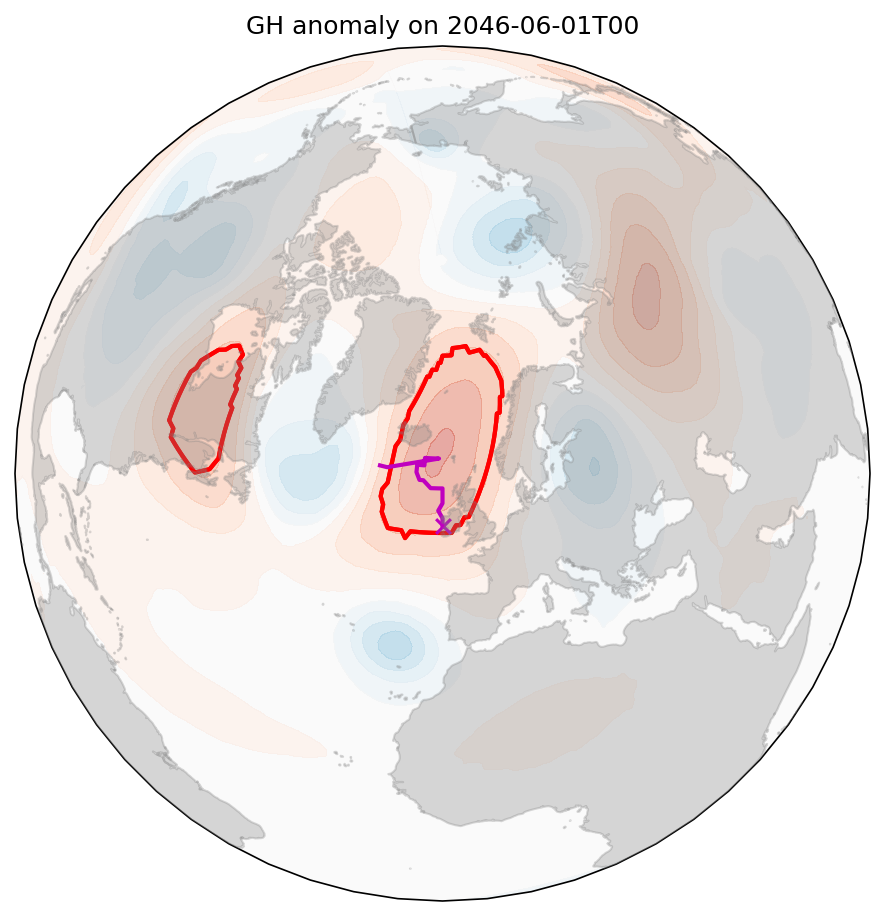

In [72]:
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.patches as mpatches
import matplotlib.path as mpath

plt.figure(figsize=(14,6),dpi=150)
#fig, ax = plt.subplots(1, 1, figsize=(16, 10), dpi=150, subplot_kw={'projection': ccrs.NorthPolarStereo()})
lon_0 = -10 #-185
lat_0 =  60.0
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=150, subplot_kw={'projection':  ccrs.Orthographic(lon_0, lat_0)})
#fig,ax=plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

### Compute a circle in axes coordinates, which we can use as a boundary
### for the map. We can pan/zoom as much as we like - the boundary will be
### permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
#ax.set_boundary(circle, transform=ax.transAxes)


###=== Shaded plots
###msl
#(msl.isel(time=0)*0.01).plot.contour(ax=ax, levels=np.arange(1010,1036,4), colors='k',linewidths=2, transform=ccrs.PlateCarree())

###humidty
#(var2.sel(time=timc)*1000).plot.contourf(ax=ax, levels=np.arange(0.8,5.2,0.2), cmap='GnBu',extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': 'Humidity [$g/Kg$]'})
###surface temp
#(var4-273).plot.contourf(ax=ax, levels=np.arange(-35,15,5), cmap='BuPu_r', alpha=0.80,extend = 'min', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': 'tas [$oC$]'})
###TOA OLR
#(var5).plot.contourf(ax=ax, levels=np.arange(150,200,5), cmap='gray', alpha=0.80,extend = 'min', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': 'OLR [$w/m^2$]'})
### precipitation
#(da.isel(time=0)*1000).plot.contourf(ax=ax, levels=np.arange(0.5,5,0.5), cmap='GnBu', alpha=0.80,extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': 'pr [$mm/day$]'})
### geop anomaly
##ano.z.sel(time=timb).plot.contourf(ax=ax, levels=np.arange(-500,500,50), cmap='RdBu_r',alpha=0.50, extend = 'max', transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': 'GH [$m$]'})
im1 =ax.contourf(clon, ano.lat,ano_new, levels=np.arange(-500,500,50), cmap='RdBu_r',alpha=0.50, extend = 'max',transform=ccrs.PlateCarree(),add_colorbar=True,cbar_kwargs={'label': 'GH [$m$]'})


###=== Contrack blocks
#flevels=[1463.5, 1464.5] ### flag
rlevels=[0.5,1.5]
#im1=block_ano.flag.sel(time=timb).plot.contour(ax=ax,levels=flevels,colors='r',linewidths=2,extend = 'neither', transform=ccrs.PlateCarree())
im1 =ax.contour(clon, block_ano.lat,block_new, levels=rlevels, colors='r',linewidths=2,extend = 'neither',transform=ccrs.PlateCarree())

# cosmetic: sometimes there is a gap near map edge where track is split:
lonts[lonts >= 355] = 359.9
lonts[lonts <= 3] = 0.1
segment = np.vstack((clonts,clatts))

#move longitude into the map region and split if longitude jumps by more than "threshold"
lon0 = 0 #center of map
bleft = lon0-0.
bright = lon0+360
segment[0,segment[0]> bright] -= 360
segment[0,segment[0]< bleft]  += 360
threshold = 180  # CHANGE HERE
isplit = np.nonzero(np.abs(np.diff(segment[0])) > threshold)[0]
subsegs = np.split(segment,isplit+1,axis=+1)

###plot the tracks
for seg in subsegs:
    x,y = seg[0],seg[1]
    ax.plot(x ,y,c = 'm',linewidth=2, transform=ccrs.PlateCarree())


ax.scatter(lonts[0],latts[0],s=50,c='m',marker="x", zorder=10, transform=ccrs.PlateCarree())

#ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree()); 
##ax.coastlines('110m', alpha=0.5)
import cartopy.feature as cfeature
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='grey',alpha=0.30),zorder=20)

plt.tight_layout()

plt.title("GH anomaly on "+timb[:13], size=12)

plt.savefig('IFS-production_block_'+timb[:13]+'.png')

In [27]:
x=np.arange(0,24*6,6)

In [62]:
str(x[0])

'0'

In [65]:
### Plot intensity over time

#for n in np.arange(1,25):
#    fig,ax=plt.subplots(figsize=(10, 4), dpi=150)
#    inty= np.asarray(block_df['Intensity'].iloc[np.where(block_df['Flag']==bid)]) #'20210326_12'
#    plt.plot(x[0:n],inty[0:n],color='m', linestyle='-', lw=2)
#    plt.plot(x[0:1],inty[0:1], 'mo')
#    ax.set_xlabel("Time (hours)")
#    ax.set_ylabel("GH (m)")
#    ax.set_xlim([0, 140])
#    ax.set_ylim([160, 240])
#    plt.savefig('IFS-production_block_intensity_case_'+str(n)+'.png')

In [79]:
#block_df['Longitude2'] = np.where(block_df['Longitude'] < 0, block_df['Longitude']+360,block_df['Longitude'])

/home/b/b382006/.conda/envs/contrack_dev/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/b/b382006/.conda/envs/contrack_dev/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/b/b382006/.conda/envs/contrack_dev/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/home/b/b382006/.co

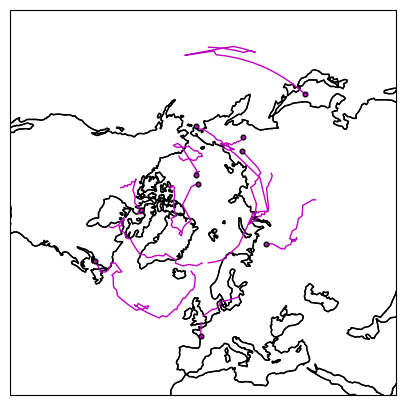

In [81]:
# plotting blocking track (center of mass) and genesis
f, ax = plt.subplots(1, 1, figsize=(7,5), subplot_kw=dict(projection=ccrs.NorthPolarStereo()))
ax.set_extent([-180, 180, 30, 90], crs=ccrs.PlateCarree()); ax.coastlines()
ax.coastlines() # add coastlines

#need to split each blocking track due to longitude wrapping (jumping at map edge)
for bid in np.unique(np.asarray(block_df['Flag'][1000:2000])): #select blocking id
    lons = np.asarray(block_df['Longitude2'].iloc[np.where(block_df['Flag']==bid)])
    lats = np.asarray(block_df['Latitude'].iloc[np.where(block_df['Flag']==bid)])

    # cosmetic: sometimes there is a gap near map edge where track is split:
    lons[lons >= 355] = 359.9
    lons[lons <= 3] = 0.1
    segment = np.vstack((lons,lats))

    #move longitude into the map region and split if longitude jumps by more than "threshold"
    lon0 = 0 #center of map
    bleft = lon0-0.
    bright = lon0+360
    segment[0,segment[0]> bright] -= 360
    segment[0,segment[0]< bleft]  += 360
    threshold = 180  # CHANGE HERE
    isplit = np.nonzero(np.abs(np.diff(segment[0])) > threshold)[0]
    subsegs = np.split(segment,isplit+1,axis=+1)

    #plot the tracks
    for seg in subsegs:
        x,y = seg[0],seg[1]
        ax.plot(x ,y,c = 'm',linewidth=1, transform=ccrs.PlateCarree())
    #plot the starting points
    ax.scatter(lons[0],lats[0],s=11,c='m', zorder=10, edgecolor='black', transform=ccrs.PlateCarree())